In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

import matplotlib.pyplot as plt

from sklearn.svm import LinearSVR
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

In [2]:
df_101 = pd.read_excel('./Datasets/Raw Data_Room 101.xlsx')
df_103 = pd.read_excel('./Datasets/Raw Data_Room 103.xlsx')
df_144 = pd.read_excel('./Datasets/Raw Data_Room 144.xlsx')

In [34]:
df_101

,Time_0,AlarmSignal_0101,Time_1,OnOffState_0101,Time_2,OperationModeState_0101,Time_3,RoomTemp_0101,Time_4,SetTemp_0101,Time_5,OUTAIRHUMD,Time_6,OUTAIRTEMP
0,08.12.2017 15:35:15,NaN,08.12.2017 15:35:00,NaN,08.12.2017 15:35:41,NaN,08.12.2017 15:34:42,NaN,08.12.2017 15:34:49,NaN,08.12.2017 15:27:45,NaN,08.12.2017 15:12:37,NaN
1,08.12.2017 15:35:23,0.0,08.12.2017 15:35:09,1.0,08.12.2017 15:35:49,2.0,08.12.2017 15:34:52,23.5,08.12.2017 15:34:52,26.0,08.12.2017 15:27:46,62.180,08.12.2017 15:12:38,15.3
2,08.12.2017 15:45:23,0.0,08.12.2017 15:45:09,1.0,08.12.2017 15:45:48,2.0,08.12.2017 15:44:51,23.5,08.12.2017 15:44:51,26.0,08.12.2017 16:01:12,62.895,08.12.2017 16:01:12,15.1
3,08.12.2017 15:55:23,0.0,08.12.2017 15:55:09,1.0,08.12.2017 15:55:48,2.0,08.12.2017 15:54:51,24.0,08.12.2017 15:54:51,26.0,08.12.2017 16:47:20,63.935,08.12.2017 16:10:47,15.6
4,08.12.2017 16:05:23,0.0,08.12.2017 16:05:09,1.0,08.12.2017 16:05:48,2.0,08.12.2017 16:04:51,24.0,08.12.2017 16:04:51,26.0,08.12.2017 17:04:22,64.975,08.12.2017 16:29:39,15.1
5,08.12.2017 16:15:23,0.0,08.12.2017 16:15:09,1.0,08.12.2017 16:15:48,2.0,08.12.2017 16:14:51,24.0,08.12.2017 16:14:51,26.0,08.12.2017 17:18:10,66.015,08.12.2017 17:47:03,14.6
6,08.12.2017 16:25:23,0.0,08.12.2017 16:25:09,1.0,08.12.2017 16:25:48,2.0,08.12.2017 16:24:51,24.5,08.12.2017 16:24:51,26.0,08.12.2017 17:44:20,67.055,08.12.2017 19:13:42,14.1
7,08.12.2017 16:35:23,0.0,08.12.2017 16:35:09,1.0,08.12.2017 16:35:48,2.0,08.12.2017 16:34:51,24.5,08.12.2017 16:34:51,26.0,08.12.2017 18:17:26,68.095,09.12.2017 01:06:04,13.6
8,08.12.2017 16:45:23,0.0,08.12.2017 16:45:09,1.0,08.12.2017 16:45:48,2.0,08.12.2017 16:44:51,24.5,08.12.2017 16:44:51,26.0,08.12.2017 18:31:54,69.135,09.12.2017 03:12:37,13.6
9,08.12.2017 16:55:23,0.0,08.12.2017 16:55:09,1.0,08.12.2017 16:55:48,2.0,08.12.2017 16:54:51,24.5,08.12.2017 16:54:51,26.0,08.12.2017 19:17:26,70.175,09.12.2017 09:14:14,14.1


# Objective
## •	1. How does the room temperature compare to the setpoint temperature? Are the trends similar or different for the given rooms? Does seasonality affect the trends in any way?


## •	2. Given the current state of the room’s architecture and HVAC system’s functionality, can we predict future values of room temperature and setpoint temperature accurately? Is this prediction accuracy independent of seasonal trends?


## •	3. Can we predict the ideal setpoint temperature for each room for optimum thermal comfort and energy efficiency based on building standards?


## •	4. Can we incorporate additional features into our models to improve the prediction accuracy and/or interpretability of our models?


## •	5. Can we generate plain-text reason codes to automate the extraction and interpretation of hidden patterns and trends across the entire dataset?


# The number of rows

In [25]:
def exetract_cleanNaN(df_Room,columns_Time,columns_Name):
    df_Room_Column =  pd.DataFrame(df_Room,columns = [columns_Time,columns_Name]).dropna(axis=0,how='any').reset_index().drop(['index'],axis=1)
    return df_Room_Column

In [26]:
df_101_Alarm = exetract_cleanNaN(df_101,'Time_0','AlarmSignal_0101')
df_101_State = exetract_cleanNaN(df_101,'Time_1','OnOffState_0101')
df_101_Mode = exetract_cleanNaN(df_101,'Time_2','OperationModeState_0101')
df_101_InTemp = exetract_cleanNaN(df_101,'Time_3','RoomTemp_0101')
df_101_SetTemp = exetract_cleanNaN(df_101,'Time_4','SetTemp_0101')
df_101_OutHum = exetract_cleanNaN(df_101,'Time_5','OUTAIRHUMD')
df_101_OutTemp = exetract_cleanNaN(df_101,'Time_6','OUTAIRTEMP')

print('Alarm:%d'%len(df_101_Alarm))
print('State:%d'%len(df_101_State))
print('Mode:%d'%len(df_101_Mode))
print('InTemp:%d'%len(df_101_InTemp))
print('SetTemp:%d'%len(df_101_SetTemp))
print('OutHum:%d'%len(df_101_OutHum))
print('OutTemp:%d'%len(df_101_OutTemp))

Alarm:88977
State:88977
Mode:96036
InTemp:88227
SetTemp:87373
OutHum:39971
OutTemp:17675


# The part of the dataset

In [27]:
print(df_101_Alarm.iloc[[0,-1],[0,1]])
print(df_101_State.iloc[[0,-1],[0,1]])
print(df_101_Mode.iloc[[0,-1],[0,1]])
print(df_101_InTemp.iloc[[0,-1],[0,1]])
print(df_101_SetTemp.iloc[[0,-1],[0,1]])
print(df_101_OutHum.iloc[[0,-1],[0,1]])
print(df_101_OutTemp.iloc[[0,-1],[0,1]])

                    Time_0  AlarmSignal_0101
0      08.12.2017 15:35:23               0.0
88976  16.09.2019 22:17:55               0.0
                    Time_1  OnOffState_0101
0      08.12.2017 15:35:09              1.0
88976  16.09.2019 22:17:55              0.0
                    Time_2  OperationModeState_0101
0      08.12.2017 15:35:49                      2.0
96035  10.10.2019 08:45:45                      1.0
                    Time_3  RoomTemp_0101
0      08.12.2017 15:34:52           23.5
88226  16.09.2019 22:17:55           26.5
                    Time_4  SetTemp_0101
0      08.12.2017 15:34:52          26.0
87372  16.09.2019 22:17:55          26.0
                    Time_5  OUTAIRHUMD
0      08.12.2017 15:27:46       62.18
39970  10.10.2019 05:33:34       69.07
                    Time_6  OUTAIRTEMP
0      08.12.2017 15:12:38        15.3
17674  10.10.2019 08:35:49        20.7


# Modify the form of the time

In [28]:
def transFormat_CleanDuplicated(df,column_names):
    df[column_names]=pd.to_datetime(df[column_names], format='%d.%m.%Y %H:%M:%S')
    df = df.drop_duplicates(column_names,keep ='first')
    df_Res = df.set_index(column_names)
    return df_Res

df_101_State_Res = transFormat_CleanDuplicated(df_101_State, 'Time_1')
df_101_Mode_Res = transFormat_CleanDuplicated(df_101_Mode, 'Time_2')
df_101_InTemp_Res = transFormat_CleanDuplicated(df_101_InTemp, 'Time_3')
df_101_SetTemp_Res = transFormat_CleanDuplicated(df_101_SetTemp, 'Time_4')
df_101_OutHum_Res = transFormat_CleanDuplicated(df_101_OutHum, 'Time_5')
df_101_OutTemp_Res = transFormat_CleanDuplicated(df_101_OutTemp, 'Time_6')


# Comparison of Room Temp and Set Temp in 101

/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


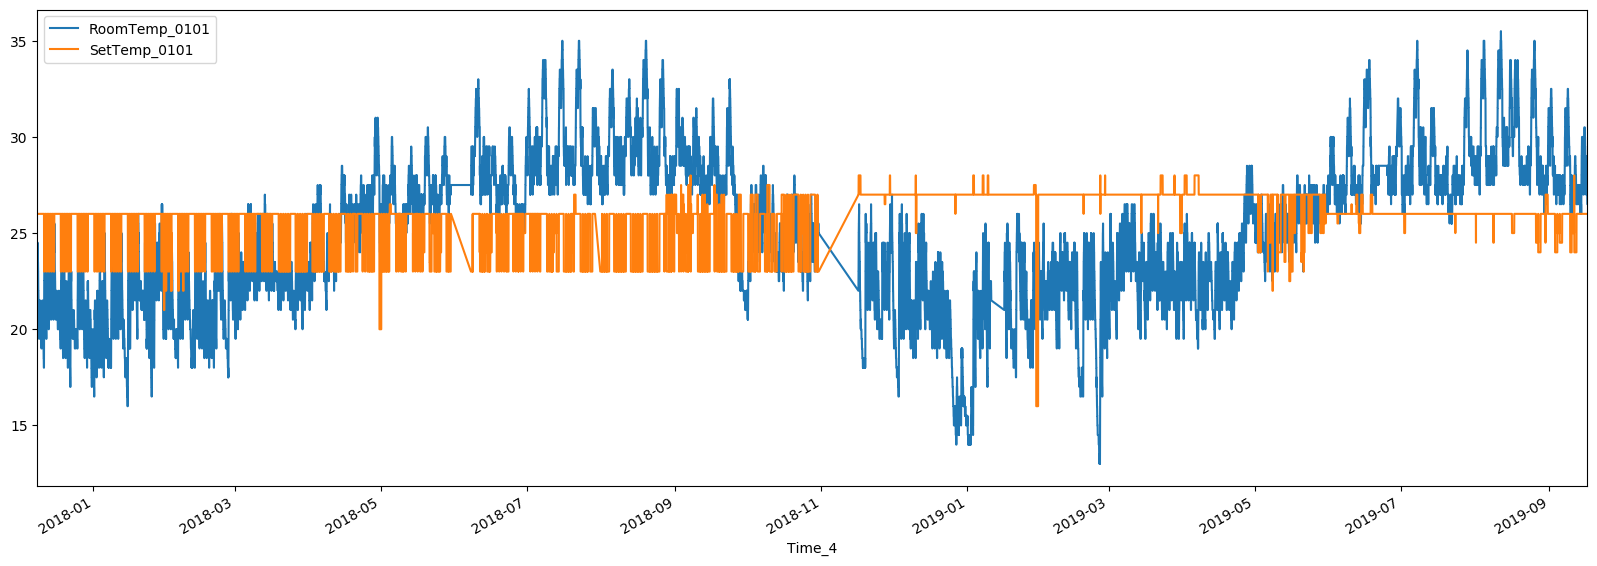

In [29]:
plt_InTemp_101 = plt.figure(figsize=(20, 7),dpi=100)
df_101_InTemp_Res['RoomTemp_0101'].plot()
df_101_SetTemp_Res['SetTemp_0101'].plot()
plt.legend()
plt_InTemp_101.show()
plt.savefig('./graph/1-1.png')

# Comparison of Room Temp and Set Temp in 103

In [30]:
df_103_Alarm = pd.DataFrame(df_103,columns = ['Time_0','AlarmSignal_0103']).dropna(axis=0,how='any').reset_index().drop(['index'],axis=1)
df_103_State = pd.DataFrame(df_103,columns = ['Time_1','OnOffState_0103']).dropna(axis=0,how='any').reset_index().drop(['index'],axis=1)
df_103_Mode = pd.DataFrame(df_103,columns = ['Time_2','OperationModeState_0103']).dropna(axis=0,how='any').reset_index().drop(['index'],axis=1)
df_103_InTemp = pd.DataFrame(df_103,columns = ['Time_3','RoomTemp_0103']).dropna(axis=0,how='any').reset_index().drop(['index'],axis=1)
df_103_SetTemp = pd.DataFrame(df_103,columns = ['Time_4','SetTemp_0103']).dropna(axis=0,how='any').reset_index().drop(['index'],axis=1)
df_103_OutHum = pd.DataFrame(df_103,columns = ['Time_5','OUTAIRHUMD']).dropna(axis=0,how='any').reset_index().drop(['index'],axis=1)
df_103_OutTemp = pd.DataFrame(df_103,columns = ['Time_6','OUTAIRTEMP']).dropna(axis=0,how='any').reset_index().drop(['index'],axis=1)
#print('Alarm:%d'%len(df_103_Alarm))
#print('State:%d'%len(df_103_State))
#print('Mode:%d'%len(df_103_Mode))
#print('InTemp:%d'%len(df_103_InTemp))
#print('SetTemp:%d'%len(df_103_SetTemp))
#print('OutHum:%d'%len(df_103_OutHum))
#print('OutTemp:%d'%len(df_103_OutTemp))

df_103_State['Time_1']=pd.to_datetime(df_103_State['Time_1'], format='%d.%m.%Y %H:%M:%S')
df_103_State_Res = df_103_State.set_index('Time_1')


df_103_Mode['Time_2']=pd.to_datetime(df_103_Mode['Time_2'], format='%d.%m.%Y %H:%M:%S')
df_103_Mode_Res = df_103_Mode.set_index('Time_2')


df_103_InTemp['Time_3']=pd.to_datetime(df_103_InTemp['Time_3'], format='%d.%m.%Y %H:%M:%S')
df_103_InTemp_Res = df_103_InTemp.set_index('Time_3')


df_103_SetTemp['Time_4']=pd.to_datetime(df_103_SetTemp['Time_4'], format='%d.%m.%Y %H:%M:%S')
df_103_SetTemp_Res = df_103_SetTemp.set_index('Time_4')


df_103_OutHum['Time_5']=pd.to_datetime(df_103_OutHum['Time_5'], format='%d.%m.%Y %H:%M:%S')
df_103_OutHum_Res = df_103_OutHum.set_index('Time_5')


df_103_OutTemp['Time_6']=pd.to_datetime(df_103_OutTemp['Time_6'], format='%d.%m.%Y %H:%M:%S')
df_103_OutTemp_Res = df_103_OutTemp.set_index('Time_6')

/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


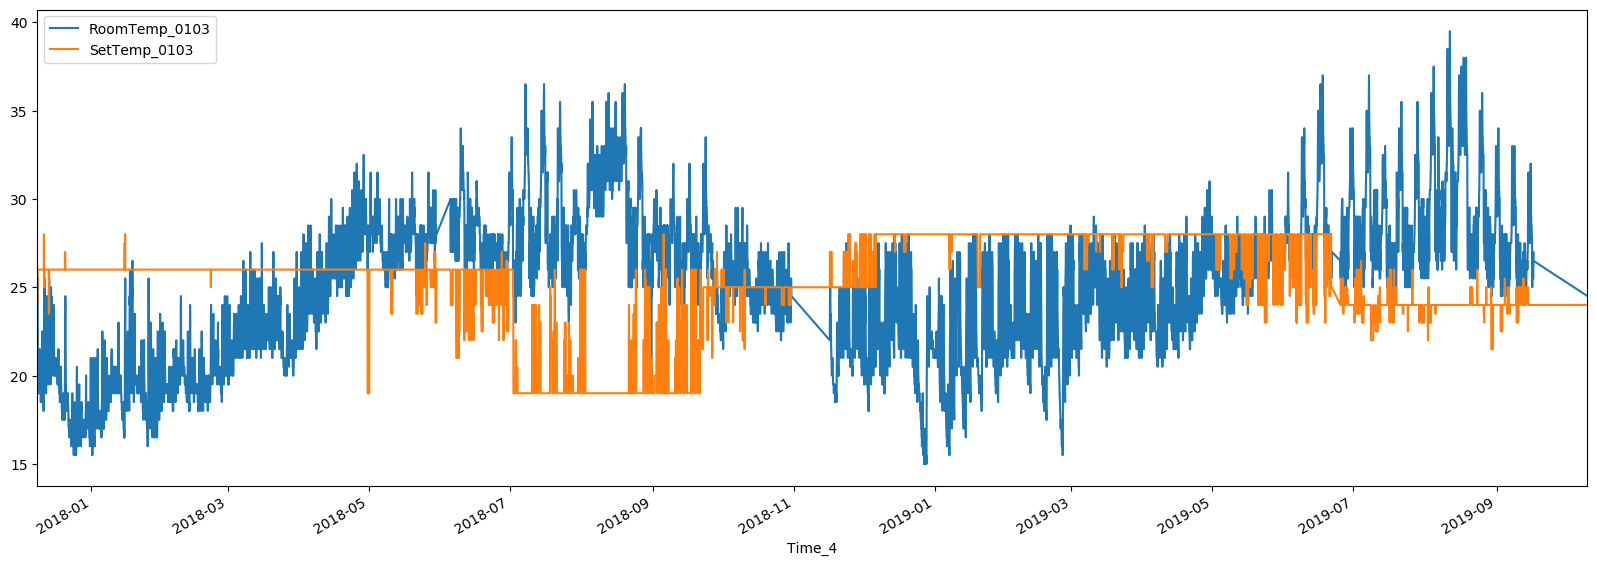

In [31]:
plt_InTemp_103 = plt.figure(figsize=(20, 7),dpi=100)
df_103_InTemp_Res['RoomTemp_0103'].plot()
df_103_SetTemp_Res['SetTemp_0103'].plot()
plt.legend()
plt.savefig('./graph/1-2.png')
plt_InTemp_103.show()

# Comparison of Room Temp and Set Temp in 144

In [32]:
df_144_Alarm = pd.DataFrame(df_144,columns = ['Time_0','AlarmSignal_0144']).dropna(axis=0,how='any').reset_index().drop(['index'],axis=1)
df_144_State = pd.DataFrame(df_144,columns = ['Time_1','OnOffState_0144']).dropna(axis=0,how='any').reset_index().drop(['index'],axis=1)
df_144_Mode = pd.DataFrame(df_144,columns = ['Time_2','OperationModeState_0144']).dropna(axis=0,how='any').reset_index().drop(['index'],axis=1)
df_144_InTemp = pd.DataFrame(df_144,columns = ['Time_3','RoomTemp_0144']).dropna(axis=0,how='any').reset_index().drop(['index'],axis=1)
df_144_SetTemp = pd.DataFrame(df_144,columns = ['Time_4','SetTemp_0144']).dropna(axis=0,how='any').reset_index().drop(['index'],axis=1)
df_144_OutHum = pd.DataFrame(df_144,columns = ['Time_5','OUTAIRHUMD']).dropna(axis=0,how='any').reset_index().drop(['index'],axis=1)
df_144_OutTemp = pd.DataFrame(df_144,columns = ['Time_6','OUTAIRTEMP']).dropna(axis=0,how='any').reset_index().drop(['index'],axis=1)

#print('Alarm:%d'%len(df_144_Alarm))
#print('State:%d'%len(df_144_State))
#print('Mode:%d'%len(df_144_Mode))
#print('InTemp:%d'%len(df_144_InTemp))
#print('SetTemp:%d'%len(df_144_SetTemp))
#print('OutHum:%d'%len(df_144_OutHum))
#print('OutTemp:%d'%len(df_144_OutTemp))
df_144_State['Time_1']=pd.to_datetime(df_144_State['Time_1'], format='%d.%m.%Y %H:%M:%S')
df_144_State_Res = df_144_State.set_index('Time_1')


df_144_Mode['Time_2']=pd.to_datetime(df_144_Mode['Time_2'], format='%d.%m.%Y %H:%M:%S')
df_144_Mode_Res = df_144_Mode.set_index('Time_2')


df_144_InTemp['Time_3']=pd.to_datetime(df_144_InTemp['Time_3'], format='%d.%m.%Y %H:%M:%S')
df_144_InTemp_Res = df_144_InTemp.set_index('Time_3')


df_144_SetTemp['Time_4']=pd.to_datetime(df_144_SetTemp['Time_4'], format='%d.%m.%Y %H:%M:%S')
df_144_SetTemp_Res = df_144_SetTemp.set_index('Time_4')


df_144_OutHum['Time_5']=pd.to_datetime(df_144_OutHum['Time_5'], format='%d.%m.%Y %H:%M:%S')
df_144_OutHum_Res = df_144_OutHum.set_index('Time_5')


df_144_OutTemp['Time_6']=pd.to_datetime(df_144_OutTemp['Time_6'], format='%d.%m.%Y %H:%M:%S')
df_144_OutTemp_Res = df_144_OutTemp.set_index('Time_6')

/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


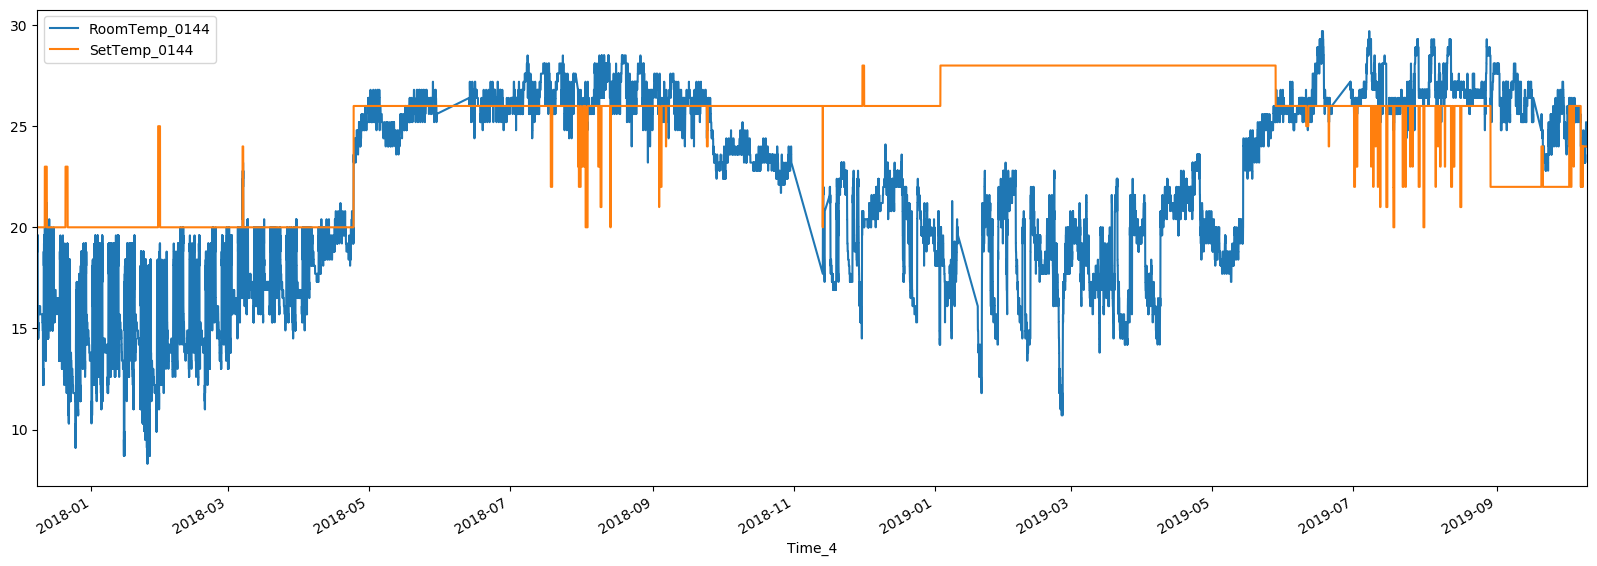

In [33]:
plt_InTemp_144 = plt.figure(figsize=(20, 7),dpi=100)
df_144_InTemp_Res['RoomTemp_0144'].plot()
df_144_SetTemp_Res['SetTemp_0144'].plot()
plt.legend()
plt.savefig('./graph/1-3.png')
plt_InTemp_144.show()

# Comparison of Room Temp in different rooms

/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  
/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


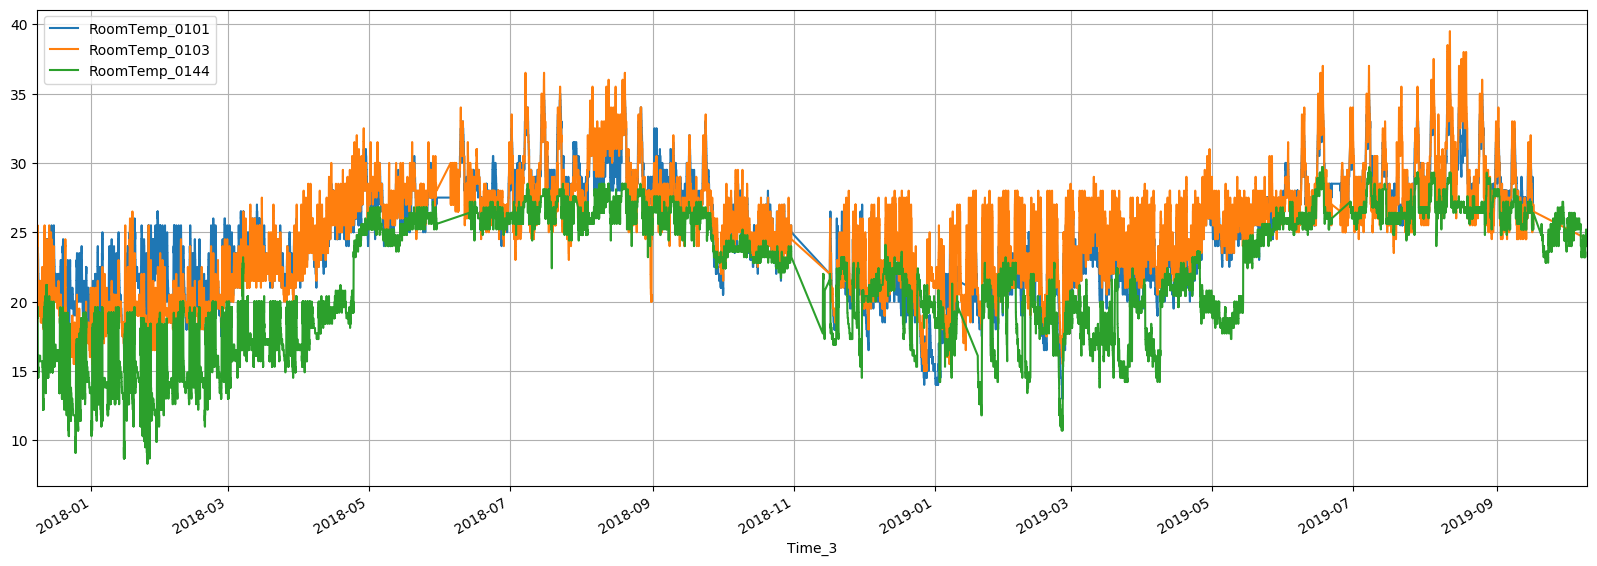

In [36]:
plt.figure(figsize=(20, 7),dpi=100)
df_101_InTemp_Res['RoomTemp_0101'].plot()
df_103_InTemp_Res['RoomTemp_0103'].plot()
plt.plot
df_144_InTemp_Res['RoomTemp_0144'].plot()
plt.grid(linestyle='-')
plt.legend()
plt.savefig('./graph/1-4.png')
plt.show()

In [24]:
df_101_Alarm_Res = df_101_Alarm.set_index('Time_0')
df_103_Alarm_Res = df_103_Alarm.set_index('Time_0')
df_144_Alarm_Res = df_144_Alarm.set_index('Time_0')

/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


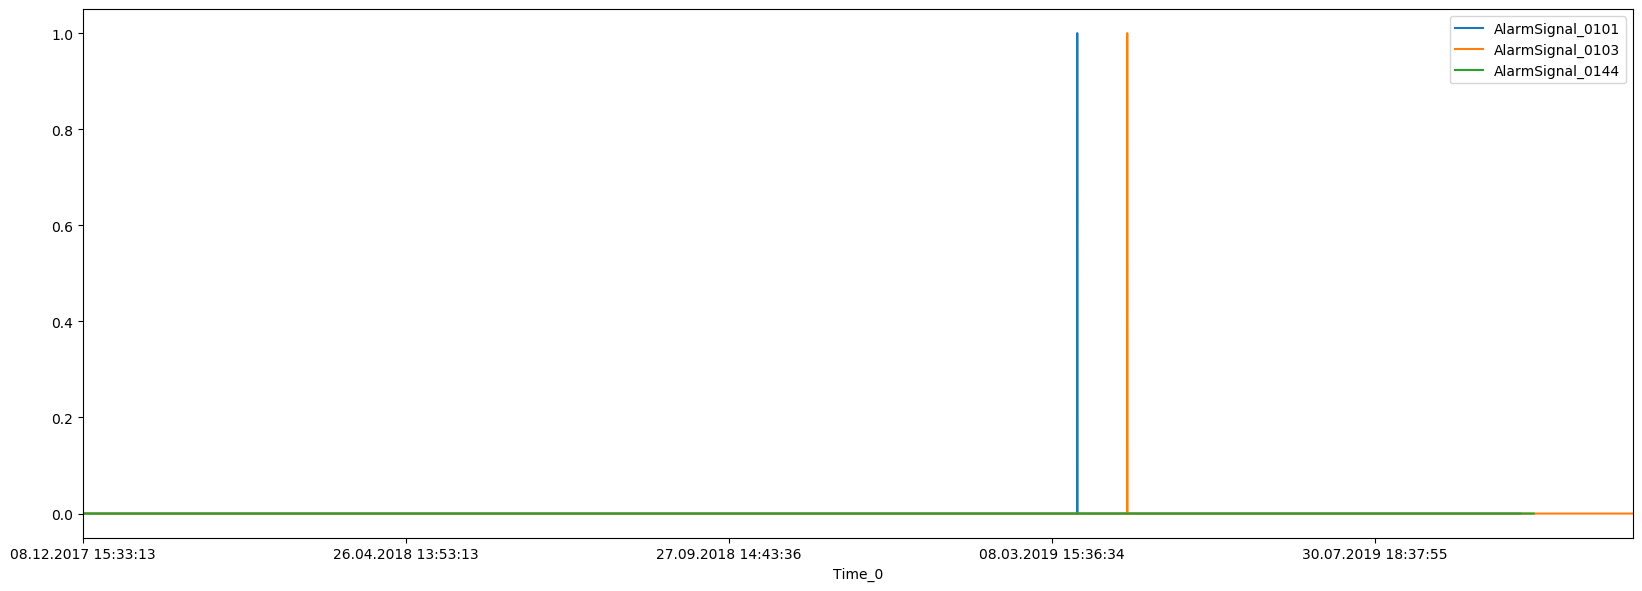

In [25]:
plt.figure(figsize=(20, 7),dpi=100)
df_101_Alarm_Res['AlarmSignal_0101'].plot()
df_103_Alarm_Res['AlarmSignal_0103'].plot()
df_144_Alarm_Res['AlarmSignal_0144'].plot()
plt.legend()
plt.show()

In [26]:
'''
print('State:%d'%len(df_101_State))
print('Mode:%d'%len(df_101_Mode))
print('InTemp:%d'%len(df_101_InTemp))
print('SetTemp:%d'%len(df_101_SetTemp))
print('OutHum:%d'%len(df_101_OutHum))
print('OutTemp:%d'%len(df_101_OutTemp))'''
df_101_State['Time_1']=pd.to_datetime(df_101_State['Time_1'], format='%d.%m.%Y %H:%M:%S')

/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


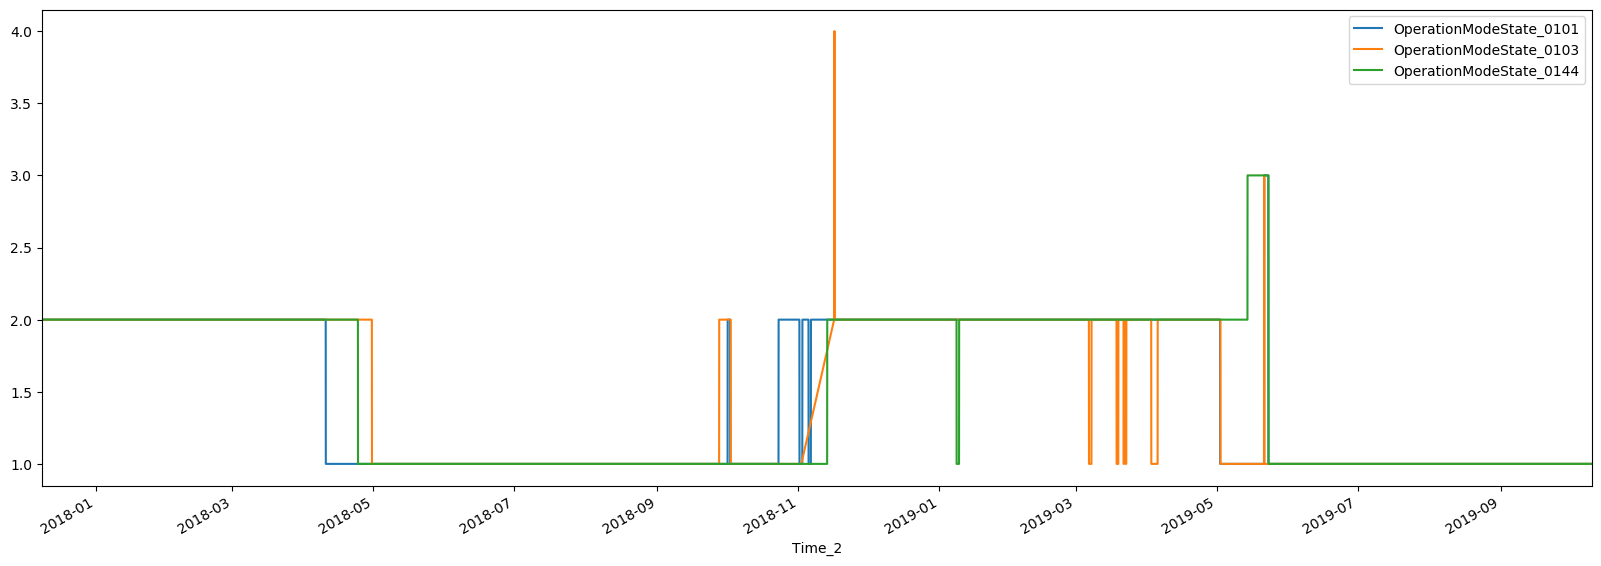

In [27]:
df_101_Mode
plt.figure(figsize=(20, 7),dpi=100)
df_101_Mode_Res['OperationModeState_0101'].plot()
df_103_Mode_Res['OperationModeState_0103'].plot()
df_144_Mode_Res['OperationModeState_0144'].plot()

plt.legend()
plt.show()

/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


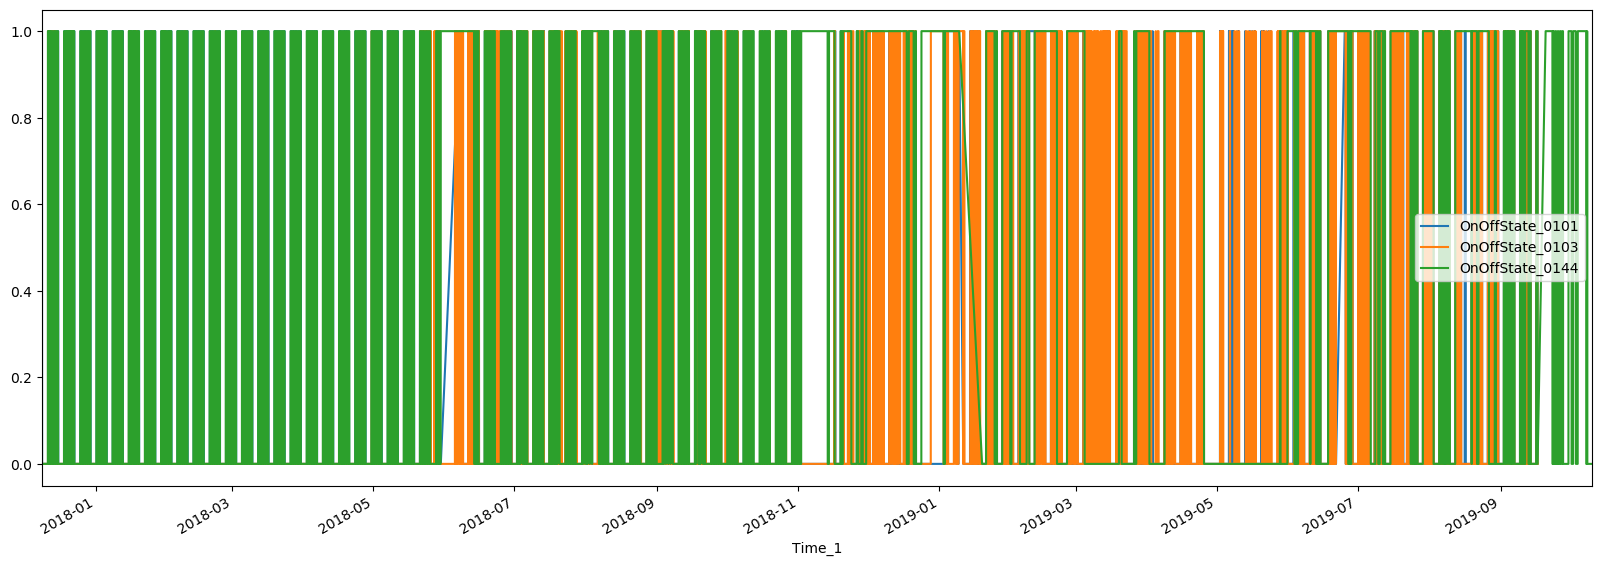

In [28]:
df_101_Mode
plt.figure(figsize=(20, 7),dpi=100)
df_101_State_Res['OnOffState_0101'].plot()
df_103_State_Res['OnOffState_0103'].plot()
df_144_State_Res['OnOffState_0144'].plot()

plt.legend()
plt.show()

# Task 2 Prediction of Room Temperature & Set Temperature

In [12]:
# Model
# Regression
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
# Classification
from sklearn.ensemble import RandomForestClassifier


# split dataset
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
# model metric
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score#R square
# preprocessing
from sklearn import preprocessing
# save model
from sklearn.externals import joblib

# 2.1 Prediction in 101 Room

## 2.1.1 Prediction of Room Temp in 101

### import datasets

In [4]:
def clean_NaN(dataset):
    dataset = dataset.dropna(axis=0,how='any').reset_index()
    dataset.drop(['index'], axis=1, inplace=True)
    return dataset

In [39]:
dataset = pd.read_csv('./Datasets/101_processed.csv')
dataset = clean_NaN(dataset)
dataset.head(10)

,Time_2,OperationModeState_0101,RoomTemp_0101,SetTemp_0101,OnOffState_0101,OUTAIRHUMD,OUTAIRTEMP
0,2017-12-08 15:35:49,2.0,23.5,26.0,1.0,62.180,15.3
1,2017-12-08 15:45:48,2.0,23.5,26.0,1.0,62.180,15.1
2,2017-12-08 15:55:48,2.0,24.0,26.0,1.0,62.180,15.1
3,2017-12-08 16:05:48,2.0,24.0,26.0,1.0,62.895,15.1
4,2017-12-08 16:15:48,2.0,24.0,26.0,1.0,62.895,15.1
5,2017-12-08 16:25:48,2.0,24.5,26.0,1.0,62.895,15.1
6,2017-12-08 16:35:48,2.0,24.5,26.0,1.0,63.935,15.6
7,2017-12-08 16:45:48,2.0,24.5,26.0,1.0,63.935,15.1
8,2017-12-08 16:55:48,2.0,24.5,26.0,1.0,63.935,15.1
9,2017-12-08 17:25:48,2.0,24.5,26.0,1.0,64.975,14.6


### Split train and test dataset

In [5]:
# ['OperationModeState_0101', 'OnOffState_0101', 'OUTAIRHUMD', 'OUTAIRTEMP']
feature = [list(dataset.columns)[1],list(dataset.columns)[4],list(dataset.columns)[5],list(dataset.columns)[6]]
# ['RoomTemp_0101']
label = [list(dataset.columns)[2]]

# Split the data but use all the columns of the csv file
X = dataset[feature]
#print(X.shape)
Y = dataset[label] 
#print(Y.shape)

# Split the data into training and testing(75% training and 25% testing data)
xtrain,xtest,ytrain,ytest=train_test_split(X, Y, random_state=0)

#print(xtrain.shape)
#print(xtest.shape)
#min_max_scaler = preprocessing.MinMaxScaler()
#X = min_max_scaler.fit_transform(X)
#Y = min_max_scaler.fit_transform(Y)

### Build Model
·**Multilinear Regression**

·**SVM-SVR Regression**

·**Random Forest Regression**

In [6]:
# sklearn functions implementation
def multilinearRegrPredict(xtrain, ytrain,xtest,ytest):
    # Create linear regression object
    reg=LinearRegression()
    # Train the model using the training sets
    
    reg.fit(xtrain,ytrain)
    # Make predictions using the testing set
    y_pred = reg.predict(xtest)
    print(list(reg.predict(xtrain))[:5]) #.predict(x axis of test data) returns a list of the predicted value of every item in the xTest .
    print("Accuracy Score from library implementation:", reg.score(xtest, ytest)) #.score(Predicted value, Y axis of Test data) methods returns the Accuracy Score or how much percentage the predicted value and the actual value matches
    print("MSE", mean_squared_error(ytest,y_pred))
    print("MAE", mean_absolute_error(ytest,y_pred))
    return y_pred, reg

In [7]:
y_pred, reg = multilinearRegrPredict(xtrain, ytrain, xtest, ytest)

[array([21.81078396]), array([27.52216747]), array([25.73385679]), array([30.14672098]), array([22.63517282])]
Accuracy Score from library implementation: 0.7618094372578863
MSE 3.2230817294473293
MAE 1.387760499746828


In [8]:
def svmsvrPredict(xtrain, ytrain, xtest, ytest):
    reg = svm.SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto', kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
    reg.fit(xtrain, ytrain)
    
    y_pred=reg.predict(xtest)
    print("MSE", mean_squared_error(ytest,y_pred))
    print("MAE", mean_absolute_error(ytest,y_pred))
    print("score", reg.score(xtest, ytest))
    return y_pred, reg

In [9]:
y_pred, reg1 = svmsvrPredict(xtrain, ytrain, xtest, ytest)

/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE 2.2111653620974017
MAE 1.0971057641772888
score 0.8365915710104687


In [15]:
def randomForestPredict(xtrain, ytrain, xtest, ytest):
    reg = RandomForestRegressor(max_depth=10, n_estimators=1000, min_samples_split=3)
    reg.fit(xtrain,ytrain)
    y_pred=reg.predict(xtest)
    print("MSE", mean_squared_error(ytest,y_pred))
    print("MAE", mean_absolute_error(ytest,y_pred))
    print("score", reg.score(xtest, ytest))
    return y_pred, reg

In [11]:
y_pred, reg2 = randomForestPredict(xtrain, ytrain, xtest, ytest)

/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MSE 1.8042435610871825
MAE 1.0227018923739242
score 0.8666637010123591


In [12]:
# plot predict and true value
dataset['pred_Temp_0101'] = reg2.predict(X)
dataset = dataset.set_index('Time_2')

MSE 1.8042435610871825
MAE 1.0227018923739242
R2 score 0.8739733454346645


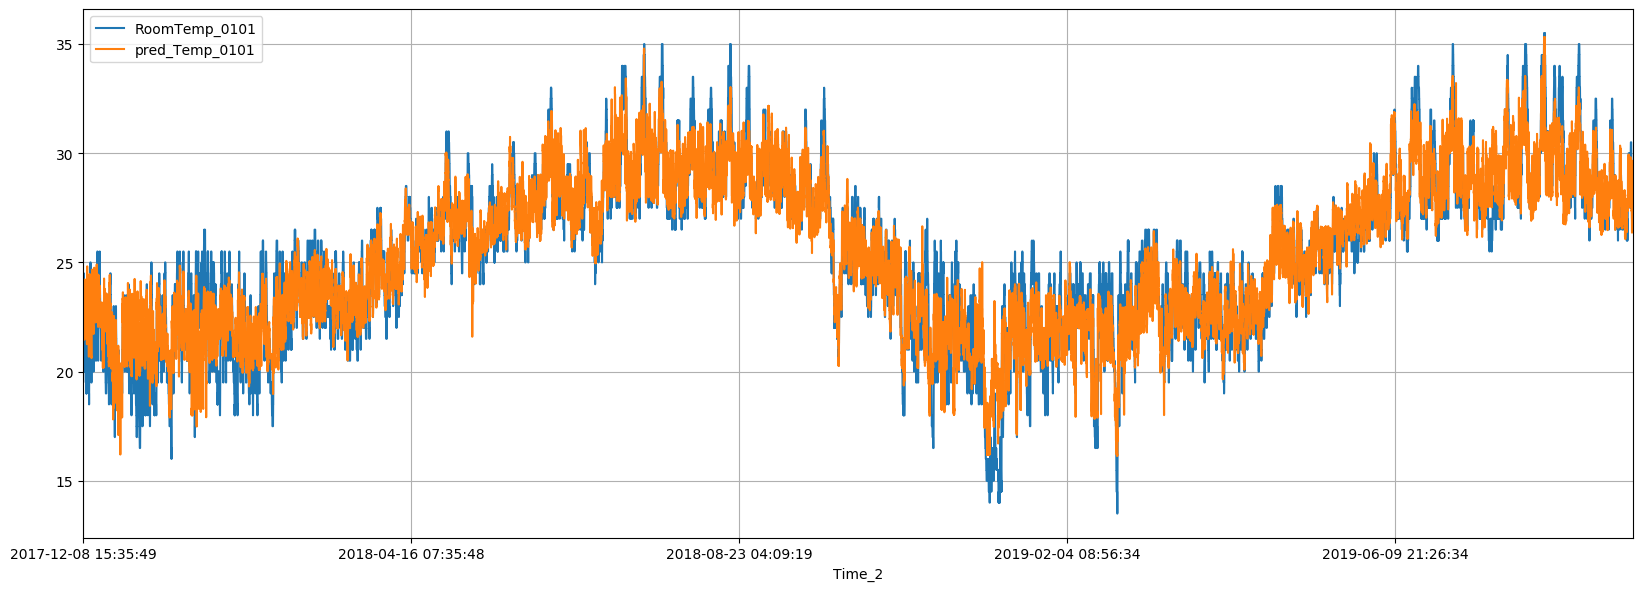

In [13]:
print("MSE", mean_squared_error(ytest,y_pred))
print("MAE", mean_absolute_error(ytest,y_pred))
print("R2 score", reg2.score(X, Y))
plt.figure(figsize=(20, 7),dpi=100)
dataset['RoomTemp_0101'].plot()
dataset['pred_Temp_0101'].plot()
plt.plot
plt.grid(linestyle='-')
plt.legend()
plt.savefig('./graph/2-1.png')
plt.show()

## 2.1.2 Prediction of Set Temp in 101
### Split train and test dataset

In [47]:
dataset = pd.read_csv('./Datasets/101_processed.csv')
dataset = clean_NaN(dataset)
dataset.tail(10)

# ['OperationModeState_0101', 'OnOffState_0101', 'OUTAIRHUMD', 'OUTAIRTEMP']
feature = [list(dataset.columns)[1],list(dataset.columns)[4],list(dataset.columns)[5],list(dataset.columns)[6]]
# ['SetTemp_0101']
label = [list(dataset.columns)[3]]

# Split the data but use all the columns of the csv file
X = dataset[feature]
#print(X.shape)
Y = dataset[label]
a = Y['SetTemp_0101'].value_counts()
# transform label value into int (for classification)
Y['SetTemp_0101'] = Y['SetTemp_0101'].map(lambda x: x*10)  

#print(Y.shape)
# Split the data into training and testing(75% training and 25% testing data)
xtrain,xtest,ytrain,ytest=train_test_split(X, Y, random_state=0)
print(xtrain.shape)
print(xtest.shape)

(35451, 4)
(11817, 4)


/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [48]:
a

26.0    19691
27.0    13815
23.0     9473
25.0     1805
24.0     1065
28.0      413
24.5      248
27.5      180
23.5       99
22.0       90
26.5       87
20.0       83
16.0       71
25.5       58
22.5       51
21.0       38
16.5        1
Name: SetTemp_0101, dtype: int64

### Build Model
·**SVM-SVC Classification**

·**Random Forest Classification**

In [16]:
# SVM-SVC multi-classification
from sklearn import svm

clf = svm.SVC(probability=True)
clf.fit(xtrain,ytrain.astype('int'))
y_pred=clf.predict(xtest)
print("MSE", mean_squared_error(ytest,y_pred))
print("MAE", mean_absolute_error(ytest,y_pred))
print("R2 score",clf.score(xtest, ytest.astype('int')))

/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


MSE 236.4051789794364
MAE 8.3989168147584
R2 score 0.5944825251755945


In [17]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(xtrain,ytrain.astype('int'))
y_pred=clf.predict(xtest)
print("MSE", mean_squared_error(ytest,y_pred))
print("MAE", mean_absolute_error(ytest,y_pred))
print("R2 score",clf.score(xtest, ytest.astype('int')))

MSE 296.4817635609715
MAE 10.107895404925108
R2 score 0.524921722941525


/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


## 2.2.1 Prediction of Room Temp in 103
### import dataset

In [18]:
dataset = pd.read_csv('./Datasets/103_processed.csv')
dataset = clean_NaN(dataset)
dataset.tail(10)

,Time_2,OperationModeState_0103,RoomTemp_0103,SetTemp_0103,OnOffState_0103,OUTAIRHUMD,OUTAIRTEMP
48375,2019-09-16 20:27:55,1.0,25.5,24.0,0.0,51.455,27.8
48376,2019-09-16 20:37:55,1.0,26.0,24.0,0.0,51.455,27.8
48377,2019-09-16 20:47:55,1.0,26.0,24.0,0.0,51.455,27.3
48378,2019-09-16 20:57:55,1.0,26.0,24.0,0.0,51.455,27.3
48379,2019-09-16 21:07:55,1.0,26.5,24.0,0.0,52.495,27.3
48380,2019-09-16 21:17:55,1.0,26.5,24.0,0.0,52.495,27.3
48381,2019-09-16 21:27:55,1.0,26.5,24.0,0.0,52.495,27.3
48382,2019-09-16 21:37:55,1.0,26.5,24.0,0.0,52.495,26.8
48383,2019-09-16 21:47:55,1.0,26.5,24.0,0.0,53.535,26.8
48384,2019-09-16 21:57:55,1.0,26.5,24.0,0.0,53.535,26.8


### Split train and test dataset

In [19]:
# ['OperationModeState_0101', 'OnOffState_0101', 'OUTAIRHUMD', 'OUTAIRTEMP']
feature = [list(dataset.columns)[1],list(dataset.columns)[4],list(dataset.columns)[5],list(dataset.columns)[6]]
# ['RoomTemp_0101']
label = [list(dataset.columns)[2]]

# Split the data but use all the columns of the csv file
X = dataset[feature]
#print(X.shape)
Y = dataset[label] 
#print(Y.shape)

# Split the data into training and testing(75% training and 25% testing data)
xtrain,xtest,ytrain,ytest=train_test_split(X, Y, random_state=1)

#print(xtrain.shape)
#print(xtest.shape)
#min_max_scaler = preprocessing.MinMaxScaler()
#X = min_max_scaler.fit_transform(X)
#Y = min_max_scaler.fit_transform(Y)

### Build model

In [20]:
y_pred, reg = randomForestPredict(xtrain, ytrain, xtest, ytest)

/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MSE 2.737830573099951
MAE 1.2303477372055116
score 0.8240498783575394


In [22]:
dataset['pred_Temp_0103'] = reg.predict(X)
dataset = dataset.set_index('Time_2')

MSE 2.737830573099951
MAE 1.2303477372055116
R2 score 0.8352739771472877


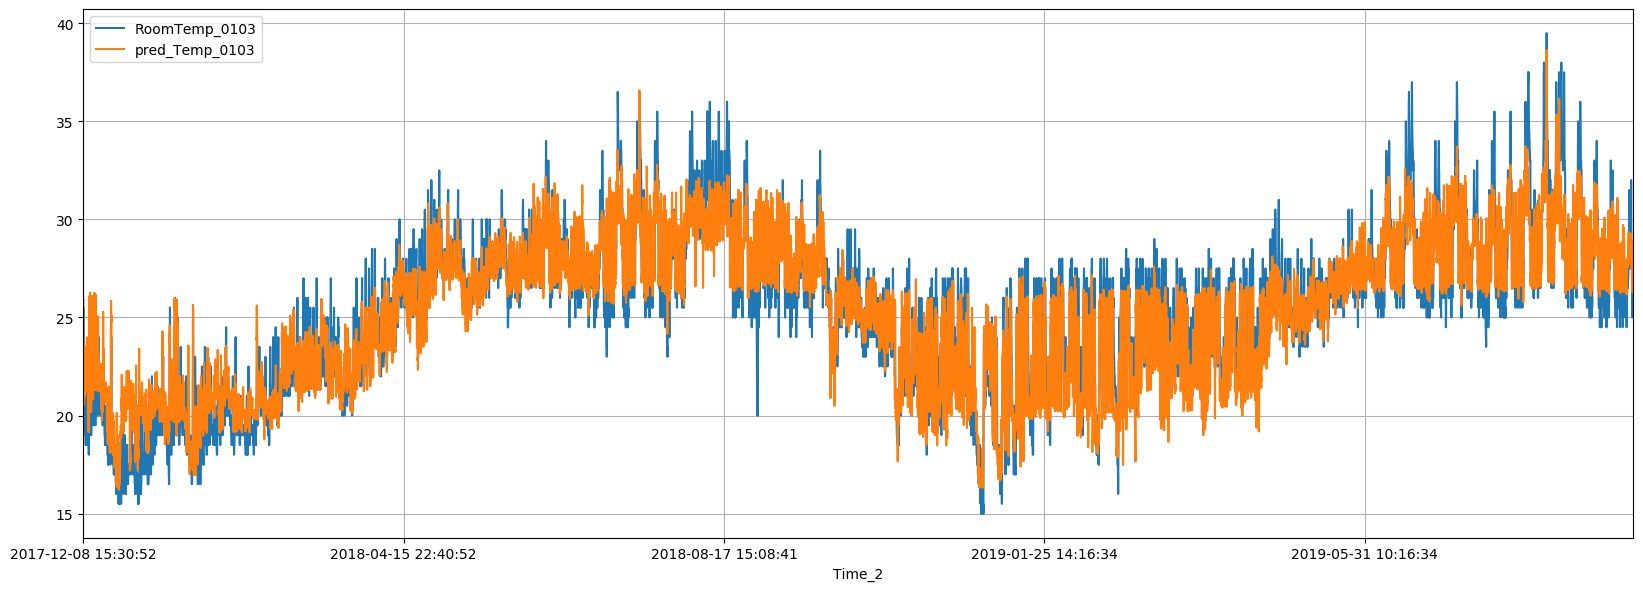

In [23]:
print("MSE", mean_squared_error(ytest,y_pred))
print("MAE", mean_absolute_error(ytest,y_pred))
print("R2 score", reg.score(X, Y))
plt.figure(figsize=(20, 7),dpi=100)
dataset['RoomTemp_0103'].plot()
dataset['pred_Temp_0103'].plot()
plt.plot
plt.grid(linestyle='-')
plt.legend()
plt.savefig('./graph/2-2.png')
plt.show()

## 2.2.2 Prediction of Set Temp in 103
### import dataset

In [24]:
dataset = pd.read_csv('./Datasets/103_processed.csv')
dataset = clean_NaN(dataset)
dataset.tail(10)

# ['OperationModeState_0103', 'OnOffState_0103', 'OUTAIRHUMD', 'OUTAIRTEMP']
feature = [list(dataset.columns)[1],list(dataset.columns)[4],list(dataset.columns)[5],list(dataset.columns)[6]]
# ['SetTemp_0101']
label = [list(dataset.columns)[3]]

# Split the data but use all the columns of the csv file
X = dataset[feature]
#print(X.shape)
Y = dataset[label]

# transform label value into int (for classification)
Y['SetTemp_0103'] = Y['SetTemp_0103'].map(lambda x: x*10)  

#print(Y.shape)
# Split the data into training and testing(75% training and 25% testing data)
xtrain,xtest,ytrain,ytest=train_test_split(X, Y, random_state=0)
print(xtrain.shape)
print(xtest.shape)

(36288, 4)
(12097, 4)


/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


### Build model

In [25]:
# SVM-SVC multi-classification
clf = svm.SVC(probability=True)
clf.fit(xtrain,ytrain.astype('int'))
y_pred=clf.predict(xtest)
print("MSE", mean_squared_error(ytest,y_pred))
print("MAE", mean_absolute_error(ytest,y_pred))
print("R2 score",clf.score(xtest, ytest.astype('int')))

/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


MSE 480.08597172852774
MAE 12.193105728693064
R2 score 0.5493097462180706


## 2.3.1 Prediction of Room Temp in 144
### import dataset

In [26]:
dataset = pd.read_csv('./Datasets/144_processed.csv')
dataset = clean_NaN(dataset)
dataset.tail(10)

,Time_2,OperationModeState_0144,RoomTemp_0144,SetTemp_0144,OnOffState_0144,OUTAIRHUMD,OUTAIRTEMP
48077,2019-10-10 02:17:21,1.0,24.4,24.0,0.0,68.03,20.7
48078,2019-10-10 02:27:21,1.0,24.4,24.0,0.0,68.03,20.7
48079,2019-10-10 02:37:21,1.0,24.4,24.0,0.0,68.03,20.7
48080,2019-10-10 02:47:21,1.0,24.4,24.0,0.0,68.03,20.7
48081,2019-10-10 02:57:21,1.0,24.4,24.0,0.0,68.03,20.7
48082,2019-10-10 03:07:21,1.0,24.4,24.0,0.0,68.03,20.7
48083,2019-10-10 05:07:21,1.0,24.4,24.0,0.0,69.07,20.2
48084,2019-10-10 05:17:21,1.0,24.4,24.0,0.0,69.07,20.2
48085,2019-10-10 05:27:21,1.0,24.4,24.0,0.0,69.07,20.2
48086,2019-10-10 05:37:21,1.0,24.4,24.0,0.0,69.07,20.2


In [13]:
# ['OperationModeState_0101', 'OnOffState_0101', 'OUTAIRHUMD', 'OUTAIRTEMP']
feature = [list(dataset.columns)[1],list(dataset.columns)[4],list(dataset.columns)[5],list(dataset.columns)[6]]
# ['RoomTemp_0101']
label = [list(dataset.columns)[2]]

# Split the data but use all the columns of the csv file
X = dataset[feature]
#print(X.shape)
Y = dataset[label] 
#print(Y.shape)

# Split the data into training and testing(75% training and 25% testing data)
xtrain,xtest,ytrain,ytest=train_test_split(X, Y, random_state=1)

#print(xtrain.shape)
#print(xtest.shape)
#min_max_scaler = preprocessing.MinMaxScaler()
#X = min_max_scaler.fit_transform(X)
#Y = min_max_scaler.fit_transform(Y)

### Build model

In [14]:
y_pred, reg2 = randomForestPredict(xtrain, ytrain, xtest, ytest)

NameError: name 'randomForestPredict' is not defined

In [29]:
dataset['pred_Temp_0144'] = reg2.predict(X)
dataset = dataset.set_index('Time_2')

MSE 1.0252367241698415
MAE 0.7371715370824785
R2 score 0.9512024686593668


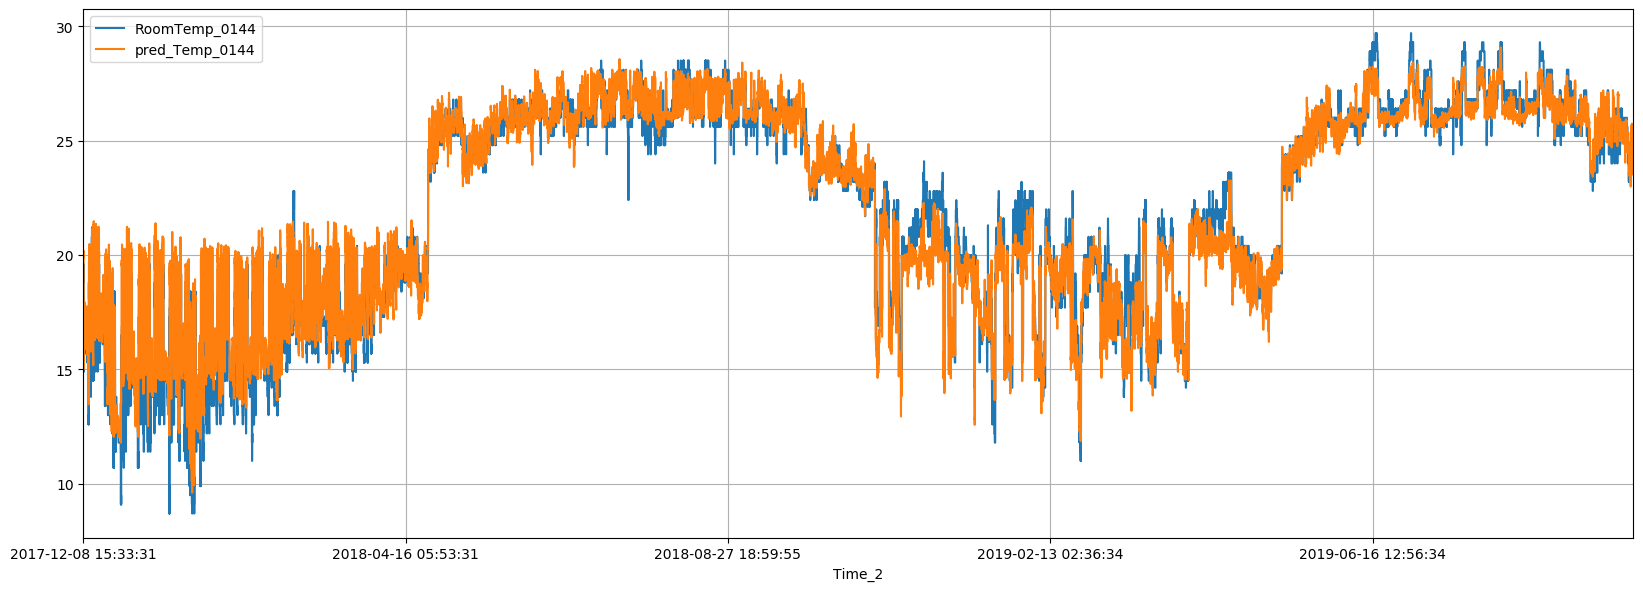

In [30]:
print("MSE", mean_squared_error(ytest,y_pred))
print("MAE", mean_absolute_error(ytest,y_pred))
print("R2 score", reg2.score(X, Y))
plt.figure(figsize=(20, 7),dpi=100)
dataset['RoomTemp_0144'].plot()
dataset['pred_Temp_0144'].plot()
plt.plot
plt.grid(linestyle='-')
plt.legend()
plt.savefig('./graph/2-3.png')
plt.show()

## 2.3.2 Prediction of Set Temp in 144
### import dataset

In [31]:
dataset = pd.read_csv('./Datasets/144_processed.csv')
dataset = clean_NaN(dataset)
dataset.tail(10)

# ['OperationModeState_0144', 'OnOffState_0144', 'OUTAIRHUMD', 'OUTAIRTEMP']
feature = [list(dataset.columns)[1],list(dataset.columns)[4],list(dataset.columns)[5],list(dataset.columns)[6]]
# ['SetTemp_0101']
label = [list(dataset.columns)[3]]

# Split the data but use all the columns of the csv file
X = dataset[feature]
#print(X.shape)
Y = dataset[label]

# transform label value into int (for classification)
Y['SetTemp_0144'] = Y['SetTemp_0144'].map(lambda x: x*10)  

#print(Y.shape)
# Split the data into training and testing(75% training and 25% testing data)
xtrain,xtest,ytrain,ytest=train_test_split(X, Y, random_state=0)
print(xtrain.shape)
print(xtest.shape)

(36065, 4)
(12022, 4)


/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


### Build model

In [32]:
# SVM-SVC multi-classification
clf = svm.SVC(probability=True)
clf.fit(xtrain,ytrain.astype('int'))
y_pred=clf.predict(xtest)
print("MSE", mean_squared_error(ytest,y_pred))
print("MAE", mean_absolute_error(ytest,y_pred))
print("R2 score",clf.score(xtest, ytest.astype('int')))

/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


MSE 1119.3229080019964
MAE 16.460655464980867
R2 score 0.7157710863417068


# Task 3

## 3.1 Prediction of Set Temp in 101

In [2]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn import svm

In [4]:
Room_101 = pd.read_csv('./Datasets/101_processed.csv')
#Room_101.head()

In [5]:
def clean_NaN(df_Room,columns_Time,column_Name):
    df_Room_Column =  pd.DataFrame(df_Room,columns = [columns_Time,column_Name]).dropna(axis=0,how='any').reset_index().drop(['index'],axis=1)
    return df_Room_Column

In [6]:
df_Room_101_clean = clean_NaN(Room_101,'Time_2','RoomTemp_0101')#清理空值
#df_Room_101_clean.head()

In [8]:
df_Room_101 = df_Room_101_clean #建立个新表，留着填数据
df_Room_101['Thermal_Comfort'] = ''
df_Room_101['Ideal Setpoint Temperature'] = ''
#df_Room_101['Energy_Efficiency'] = ''
df_Room_101['Time_2'] = pd.to_datetime(df_Room_101['Time_2'])
#df_Room_101 = df_Room_101.drop(columns='Unnamed: 0')
df_Room_101 = df_Room_101.set_index('Time_2')
#df_Room_101['dayofweek'] = df_Room_101.index.dayofweek
df_Room_101['hour'] = df_Room_101.index.hour
df_Room_101['month'] = df_Room_101.index.month
#df_Room_101.head()
df_Room_101 = df_Room_101.reset_index()

In [9]:
df_Room_101['Time_2'] = pd.to_datetime(df_Room_101['Time_2'])
#Winter 9-2
Room_101_W = df_Room_101[((df_Room_101['Time_2'] >=pd.to_datetime('20170901')) & (df_Room_101['Time_2'] <= pd.to_datetime('20180301')))|
                      ((df_Room_101['Time_2'] >=pd.to_datetime('20180901')) & (df_Room_101['Time_2'] <= pd.to_datetime('20190301')))|
                      ((df_Room_101['Time_2'] >=pd.to_datetime('20190901')) & (df_Room_101['Time_2'] <= pd.to_datetime('20200301')))]
#Summer 3-8
Room_101_S = df_Room_101[((df_Room_101['Time_2'] >=pd.to_datetime('20180301')) & (df_Room_101['Time_2'] <= pd.to_datetime('20180901')))|
                      ((df_Room_101['Time_2'] >=pd.to_datetime('20190301')) & (df_Room_101['Time_2'] <= pd.to_datetime('20190901')))]

In [10]:
RTemp_W = Room_101_W['RoomTemp_0101'].tolist()
The_Com_W = Room_101_W['Thermal_Comfort'].tolist()
Set_W = Room_101_W['Ideal Setpoint Temperature'].tolist()

In [11]:
for i in range(0,len(RTemp_W)):#先把thermal comfort填上去, 0-Cold, 1-Comfortable, 2-Hot
    if (RTemp_W[i]<21):
        The_Com_W[i] = 0
    if (21<=RTemp_W[i]<=23):
        The_Com_W[i] = 1
    if (RTemp_W[i]>23):
        The_Com_W[i] = 2
Room_101_W['Thermal_Comfort'] = The_Com_W
for i in range(0,len(RTemp_W)):#理想的设定温度
    if (RTemp_W[i]<18):
        Set_W[i] = 23
    if (18<=RTemp_W[i]<21):
        Set_W[i] = 22.5
    if (21<=RTemp_W[i]<=23):
        Set_W[i] = 22
    if (23<RTemp_W[i]<26):
        Set_W[i] = 21.5
    if (RTemp_W[i]>=26):
        Set_W[i] = 21
Room_101_W['Ideal Setpoint Temperature'] =Set_W

C:\Users\Zainy\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Zainy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
RTemp_S = Room_101_S['RoomTemp_0101'].tolist()
The_Com_S = Room_101_S['Thermal_Comfort'].tolist()
Set_S = Room_101_S['Ideal Setpoint Temperature'].tolist()

In [13]:
for i in range(0,len(RTemp_S)):#先把thermal comfort填上去, 0-Cpld, 1-Comfortable, 2-Hot
    if (RTemp_S[i]<21):
        The_Com_S[i] = 0
    if (21<=RTemp_S[i]<=23):
        The_Com_S[i] = 1
    if (RTemp_S[i]>23):
        The_Com_S[i] = 2
Room_101_S['Thermal_Comfort'] = The_Com_S

for i in range(0,len(RTemp_S)):#理想的设定温度
    if (RTemp_S[i]<19):
        Set_S[i] = 24
    if (19<=RTemp_S[i]<22):
        Set_S[i] = 23.5
    if (22<=RTemp_S[i]<=24):
        Set_S[i] = 23
    if (24<RTemp_S[i]<=27):
        Set_S[i] = 22.5
    if (RTemp_S[i]>27):
        Set_S[i] = 22
Room_101_S['Ideal Setpoint Temperature'] =Set_S

C:\Users\Zainy\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Zainy\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
Room_101_final = pd.merge(Room_101_W,Room_101_S,how='outer')
Room_101_final.to_csv('./Datasets/Room_101_final.csv')

In [15]:
train_set_101 = Room_101_final[Room_101_final['Time_2'] <=pd.to_datetime('20190401')]
test_set_101 = Room_101_final[Room_101_final['Time_2'] >=pd.to_datetime('20190401')]

In [16]:
def Changedatetime(dt):#datetime转换为字符串
    str1 = dt.strftime('%Y-%m-%d %H:%M:%S')
    return str1

time_1 = train_set_101['Time_2'].tolist()
for i in range(len(time_1)):
    time_1[i] = Changedatetime(time_1[i])
train_set_101['Time_2']=time_1

time_2 = test_set_101['Time_2'].tolist()
for i in range(len(time_2)):
    time_2[i] = Changedatetime(time_2[i])
test_set_101['Time_2']=time_2

C:\Users\Zainy\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Zainy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [17]:
xtrain1 = train_set_101[list(train_set_101.columns)[1]]
xtrain2 = train_set_101[list(train_set_101.columns)[-2:]]
xtrain = xtrain2.join(xtrain1)
xtest1 = test_set_101[list(test_set_101.columns)[1]]
xtest2 = test_set_101[list(test_set_101.columns)[-2:]]
xtest = xtest2.join(xtest1)

ytrain = train_set_101[list(train_set_101.columns)[-3]]
ytest = test_set_101[list(test_set_101.columns)[-3]]

In [19]:
ytrain = ytrain.map(lambda x: x*10)
ytest = ytest.map(lambda x:x*10)

In [20]:
clf = svm.SVC(probability=True, gamma = 'auto')
clf.fit(xtrain,ytrain.astype('int'))
y_pred=clf.predict(xtest)
print("MSE", mean_squared_error(ytest,y_pred))
print("MAE", mean_absolute_error(ytest,y_pred))
print(clf.score(xtest, ytest.astype('int')))

MSE 0.40833508735003154
MAE 0.029888444537992002
0.9975163123552936


## 3.2 Prediction of Set Temp in 103

In [21]:
Room_103 = pd.read_csv('./Datasets/103_processed.csv')
Room_103.head()

,Time_2,OperationModeState_0103,RoomTemp_0103,SetTemp_0103,OnOffState_0103,OUTAIRHUMD,OUTAIRTEMP
0,2017-12-08 15:30:52,2.0,24.0,24.0,1.0,62.180,15.3
1,2017-12-08 15:40:52,2.0,24.0,24.0,1.0,62.180,15.3
2,2017-12-08 15:50:52,2.0,24.0,24.0,1.0,62.180,15.1
3,2017-12-08 16:00:52,2.0,24.5,24.0,1.0,62.895,15.1
4,2017-12-08 16:10:52,2.0,24.5,26.0,1.0,62.895,15.1


In [22]:
df_Room_103_clean = clean_NaN(Room_103,'Time_2','RoomTemp_0103')#清理空值

In [23]:
df_Room_103 = df_Room_103_clean #建立个新表，留着填数据
df_Room_103['Thermal_Comfort'] = ''
df_Room_103['Ideal Setpoint Temperature'] = ''
df_Room_103['Time_2'] = pd.to_datetime(df_Room_103['Time_2'])
#df_Room_101 = df_Room_101.drop(columns='Unnamed: 0')
df_Room_103 = df_Room_103.set_index('Time_2')
#df_Room_103['dayofweek'] = df_Room_103.index.dayofweek
df_Room_103['hour'] = df_Room_103.index.hour
df_Room_103['month'] = df_Room_103.index.month
df_Room_103 = df_Room_103.reset_index()

In [24]:
df_Room_103['Time_2'] = pd.to_datetime(df_Room_103['Time_2'])
#Winter 9-2
Room_103_W = df_Room_103[((df_Room_103['Time_2'] >=pd.to_datetime('20170901')) & (df_Room_103['Time_2'] <= pd.to_datetime('20180301')))|
                      ((df_Room_103['Time_2'] >=pd.to_datetime('20180901')) & (df_Room_103['Time_2'] <= pd.to_datetime('20190301')))|
                      ((df_Room_103['Time_2'] >=pd.to_datetime('20190901')) & (df_Room_103['Time_2'] <= pd.to_datetime('20200301')))]
#Summer 3-8
Room_103_S = df_Room_103[((df_Room_103['Time_2'] >=pd.to_datetime('20180301')) & (df_Room_103['Time_2'] <= pd.to_datetime('20180901')))|
                      ((df_Room_103['Time_2'] >=pd.to_datetime('20190301')) & (df_Room_103['Time_2'] <= pd.to_datetime('20190901')))]

In [25]:
RTemp_W = Room_103_W['RoomTemp_0103'].tolist()
The_Com_W = Room_103_W['Thermal_Comfort'].tolist()
Set_W = Room_103_W['Ideal Setpoint Temperature'].tolist()

In [26]:
for i in range(0,len(RTemp_W)):#先把thermal comfort填上去, 0-Cpld, 1-Comfortable, 2-Hot
    if (RTemp_W[i]<21):
        The_Com_W[i] = 0
    if (21<=RTemp_W[i]<=23):
        The_Com_W[i] = 1
    if (RTemp_W[i]>23 ):
        The_Com_W[i] = 2
Room_103_W['Thermal_Comfort'] = The_Com_W
for i in range(0,len(RTemp_W)):#理想的设定温度
    if (RTemp_W[i]<18):
        Set_W[i] = 23
    if (18<=RTemp_W[i]<21):
        Set_W[i] = 22.5
    if (21<=RTemp_W[i]<=23):
        Set_W[i] = 22
    if (23<RTemp_W[i]<26):
        Set_W[i] = 21.5
    if (RTemp_W[i]>=26):
        Set_W[i] = 21
Room_103_W['Ideal Setpoint Temperature'] =Set_W

C:\Users\Zainy\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Zainy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
RTemp_S = Room_103_S['RoomTemp_0103'].tolist()
The_Com_S = Room_103_S['Thermal_Comfort'].tolist()
Set_S = Room_103_S['Ideal Setpoint Temperature'].tolist()

In [28]:
for i in range(0,len(RTemp_S)):#先把thermal comfort填上去, 0-Cpld, 1-Comfortable, 2-Hot
    if (RTemp_S[i]<21):
        The_Com_S[i] = 0
    if (21<=RTemp_S[i]<=23):
        The_Com_S[i] = 1
    if (RTemp_S[i]>23):
        The_Com_S[i] = 2
Room_103_S['Thermal_Comfort'] = The_Com_S
for i in range(0,len(RTemp_S)):#理想的设定温度
    if (RTemp_S[i]<19):
        Set_S[i] = 24
    if (19<=RTemp_S[i]<22):
        Set_S[i] = 23.5
    if (22<=RTemp_S[i]<=24):
        Set_S[i] = 23
    if (24<RTemp_S[i]<=27):
        Set_S[i] = 22.5
    if (RTemp_S[i]>27):
        Set_S[i] = 22
Room_103_S['Ideal Setpoint Temperature'] =Set_S

C:\Users\Zainy\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Zainy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [29]:
Room_103_final = pd.merge(Room_103_W,Room_103_S,how='outer')
Room_103_final.to_csv('./Datasets/Room_103_final.csv')
train_set_103 = Room_103_final[Room_103_final['Time_2'] <=pd.to_datetime('20190401')]
test_set_103 = Room_103_final[Room_103_final['Time_2'] >=pd.to_datetime('20190401')]

In [30]:
xtrain1 = train_set_103[list(train_set_103.columns)[1]]
xtrain2 = train_set_103[list(train_set_103.columns)[-2:]]
xtrain = xtrain2.join(xtrain1)
xtest1 = test_set_103[list(test_set_103.columns)[1]]
xtest2 = test_set_103[list(test_set_103.columns)[-2:]]
xtest = xtest2.join(xtest1)

ytrain = train_set_103[list(train_set_103.columns)[-3]]
ytest = test_set_103[list(test_set_103.columns)[-3]]

In [31]:
ytrain = ytrain.map(lambda x: x*10)
ytest = ytest.map(lambda x:x*10)

clf = svm.SVC(probability=True, gamma = 'auto')
clf.fit(xtrain,ytrain.astype('int'))
y_pred=clf.predict(xtest)
print("MSE", mean_squared_error(ytest,y_pred))
print("MAE", mean_absolute_error(ytest,y_pred))
print(clf.score(xtest, ytest.astype('int')))

MSE 0.009471291463209295
MAE 0.0018942582926418589
0.9996211483414716


## 3.3 Prediction of Set Temp in 144

In [32]:
Room_144 = pd.read_csv('./Datasets/144_processed.csv')
df_Room_144_clean = clean_NaN(Room_144,'Time_2','RoomTemp_0144')#清理空值

In [33]:
df_Room_144 = df_Room_144_clean #建立个新表，留着填数据
df_Room_144['Thermal_Comfort'] = ''
df_Room_144['Ideal Setpoint Temperature'] = ''
df_Room_144['Time_2'] = pd.to_datetime(df_Room_144['Time_2'])
#df_Room_101 = df_Room_101.drop(columns='Unnamed: 0')
df_Room_144 = df_Room_144.set_index('Time_2')
#df_Room_144['dayofweek'] = df_Room_144.index.dayofweek
df_Room_144['hour'] = df_Room_144.index.hour
df_Room_144['month'] = df_Room_144.index.month
df_Room_144 = df_Room_144.reset_index()

In [34]:
df_Room_144['Time_2'] = pd.to_datetime(df_Room_144['Time_2'])
#Winter 9-2
Room_144_W = df_Room_144[((df_Room_144['Time_2'] >=pd.to_datetime('20170901')) & (df_Room_144['Time_2'] <= pd.to_datetime('20180301')))|
                      ((df_Room_144['Time_2'] >=pd.to_datetime('20180901')) & (df_Room_144['Time_2'] <= pd.to_datetime('20190301')))|
                      ((df_Room_144['Time_2'] >=pd.to_datetime('20190901')) & (df_Room_144['Time_2'] <= pd.to_datetime('20200301')))]
#Summer 3-8
Room_144_S = df_Room_144[((df_Room_144['Time_2'] >=pd.to_datetime('20180301')) & (df_Room_144['Time_2'] <= pd.to_datetime('20180901')))|
                      ((df_Room_144['Time_2'] >=pd.to_datetime('20190301')) & (df_Room_144['Time_2'] <= pd.to_datetime('20190901')))]

In [35]:
RTemp_W = Room_144_W['RoomTemp_0144'].tolist()
The_Com_W = Room_144_W['Thermal_Comfort'].tolist()
Set_W = Room_144_W['Ideal Setpoint Temperature'].tolist()

In [36]:
for i in range(0,len(RTemp_W)):#先把thermal comfort填上去, 0-Cpld, 1-Comfortable, 2-Hot
    if (RTemp_W[i]<21):
        The_Com_W[i] = 0
    if (21<=RTemp_W[i]<=23):
        The_Com_W[i] = 1
    if (RTemp_W[i]>23):
        The_Com_W[i] = 2
Room_144_W['Thermal_Comfort'] = The_Com_W
for i in range(0,len(RTemp_W)):#理想的设定温度
    if (RTemp_W[i]<18):
        Set_W[i] = 23
    if (18<=RTemp_W[i]<21):
        Set_W[i] = 22.5
    if (21<=RTemp_W[i]<=23):
        Set_W[i] = 22
    if (23<RTemp_W[i]<26):
        Set_W[i] = 21.5
    if (RTemp_W[i]>=26):
        Set_W[i] = 21
Room_144_W['Ideal Setpoint Temperature'] =Set_W

C:\Users\Zainy\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Zainy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [37]:
RTemp_S = Room_144_S['RoomTemp_0144'].tolist()
The_Com_S = Room_144_S['Thermal_Comfort'].tolist()
Set_S = Room_144_S['Ideal Setpoint Temperature'].tolist()

In [38]:
for i in range(0,len(RTemp_S)):#先把thermal comfort填上去, 0-Cpld, 1-Comfortable, 2-Hot
    if (RTemp_S[i]<21):
        The_Com_S[i] = 0
    if (21<=RTemp_S[i]<=23):
        The_Com_S[i] = 1
    if (RTemp_S[i]>23):
        The_Com_S[i] = 2
Room_144_S['Thermal_Comfort'] = The_Com_S
for i in range(0,len(RTemp_S)):#理想的设定温度
    if (RTemp_S[i]<19):
        Set_S[i] = 24
    if (19<=RTemp_S[i]<22):
        Set_S[i] = 23.5
    if (22<=RTemp_S[i]<=24):
        Set_S[i] = 23
    if (24<RTemp_S[i]<=27):
        Set_S[i] = 22.5
    if (RTemp_S[i]>27):
        Set_S[i] = 22
Room_144_S['Ideal Setpoint Temperature'] =Set_S

C:\Users\Zainy\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Zainy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [39]:
Room_144_final = pd.merge(Room_144_W,Room_144_S,how='outer')
Room_144_final.to_csv('./Datasets/Room_144_final.csv')
train_set_144 = Room_144_final[Room_144_final['Time_2'] <=pd.to_datetime('20190401')]
test_set_144 = Room_144_final[Room_144_final['Time_2'] >=pd.to_datetime('20190401')]

In [40]:
xtrain1 = train_set_144[list(train_set_144.columns)[1]]
xtrain2 = train_set_144[list(train_set_144.columns)[-2:]]
xtrain = xtrain2.join(xtrain1)
xtest1 = test_set_144[list(test_set_144.columns)[1]]
xtest2 = test_set_144[list(test_set_144.columns)[-2:]]
xtest = xtest2.join(xtest1)

ytrain = train_set_144[list(train_set_144.columns)[-3]]
ytest = test_set_144[list(test_set_144.columns)[-3]]

In [41]:
ytrain = ytrain.map(lambda x: x*10)
ytest = ytest.map(lambda x:x*10)

clf = svm.SVC(probability=True, gamma = 'auto')
clf.fit(xtrain,ytrain.astype('int'))
y_pred=clf.predict(xtest)
print("MSE", mean_squared_error(ytest,y_pred))
print("MAE", mean_absolute_error(ytest,y_pred))
print(clf.score(xtest, ytest.astype('int')))

MSE 0.14484690353771776
MAE 0.02551607704704167
0.9952421149566418


# Task 4

In [38]:
# Model
# Regression
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
# Classification
from sklearn.ensemble import RandomForestClassifier


# split dataset
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
# model metric
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score#R square
# preprocessing
from sklearn import preprocessing
# save model
from sklearn.externals import joblib

In [39]:
def randomForestPredict(xtrain, ytrain, xtest, ytest):
    reg = RandomForestRegressor(max_depth=10, n_estimators=1000, min_samples_split=3)
    reg.fit(xtrain,ytrain)
    y_pred=reg.predict(xtest)
    print("MSE", mean_squared_error(ytest,y_pred))
    print("MAE", mean_absolute_error(ytest,y_pred))
    print("score", reg.score(xtest, ytest))
    return y_pred, reg

In [40]:
def clean_NaN(dataset):
    dataset = dataset.dropna(axis=0,how='any').reset_index()
    dataset.drop(['index'], axis=1, inplace=True)
    return dataset

In [49]:
dataset = pd.read_csv('./Datasets/101_processed.csv')
dataset = clean_NaN(dataset)
dataset['Time_2']=pd.to_datetime(dataset['Time_2'], format='%Y-%m-%d %H:%M:%S')
dataset = dataset.set_index('Time_2')
# 加入month和hour
dataset['month'] = dataset.index.month
dataset['hour'] = dataset.index.hour
dataset = dataset.reset_index()
dataset.tail(10)

,Time_2,OperationModeState_0101,RoomTemp_0101,SetTemp_0101,OnOffState_0101,OUTAIRHUMD,OUTAIRTEMP,month,hour
47258,2019-09-16 20:27:55,1.0,26.5,26.0,1.0,51.455,27.8,9,20
47259,2019-09-16 20:37:55,1.0,26.5,26.0,1.0,51.455,27.8,9,20
47260,2019-09-16 20:47:55,1.0,26.5,26.0,1.0,51.455,27.3,9,20
47261,2019-09-16 20:57:55,1.0,26.5,26.0,1.0,51.455,27.3,9,20
47262,2019-09-16 21:07:55,1.0,26.5,26.0,1.0,52.495,27.3,9,21
47263,2019-09-16 21:17:55,1.0,26.5,26.0,1.0,52.495,27.3,9,21
47264,2019-09-16 21:27:55,1.0,26.5,26.0,1.0,52.495,27.3,9,21
47265,2019-09-16 21:37:55,1.0,26.5,26.0,1.0,52.495,26.8,9,21
47266,2019-09-16 21:47:55,1.0,26.5,26.0,1.0,53.535,26.8,9,21
47267,2019-09-16 21:57:55,1.0,26.5,26.0,0.0,53.535,26.8,9,21


In [50]:
# ['OperationModeState_0101', 'OnOffState_0101', 'OUTAIRHUMD', 'OUTAIRTEMP']
feature = [list(dataset.columns)[1],list(dataset.columns)[4],list(dataset.columns)[5],list(dataset.columns)[6],list(dataset.columns)[7],list(dataset.columns)[8]]
# ['RoomTemp_0101']
label = [list(dataset.columns)[2]]

# Split the data but use all the columns of the csv file
X = dataset[feature]
#print(X.shape)
Y = dataset[label] 
#print(Y.shape)


# Split the data into training and testing(75% training and 25% testing data)
xtrain,xtest,ytrain,ytest=train_test_split(X, Y, random_state=1)

#print(xtrain.shape)
#print(xtest.shape)

#min_max_scaler = preprocessing.MinMaxScaler()
#X = min_max_scaler.fit_transform(X)
#Y = min_max_scaler.fit_transform(Y)


In [51]:
y_pred, reg = randomForestPredict(xtrain, ytrain, xtest, ytest)


/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MSE 1.2350935679421955
MAE 0.8254085909867541
score 0.9073571298646002


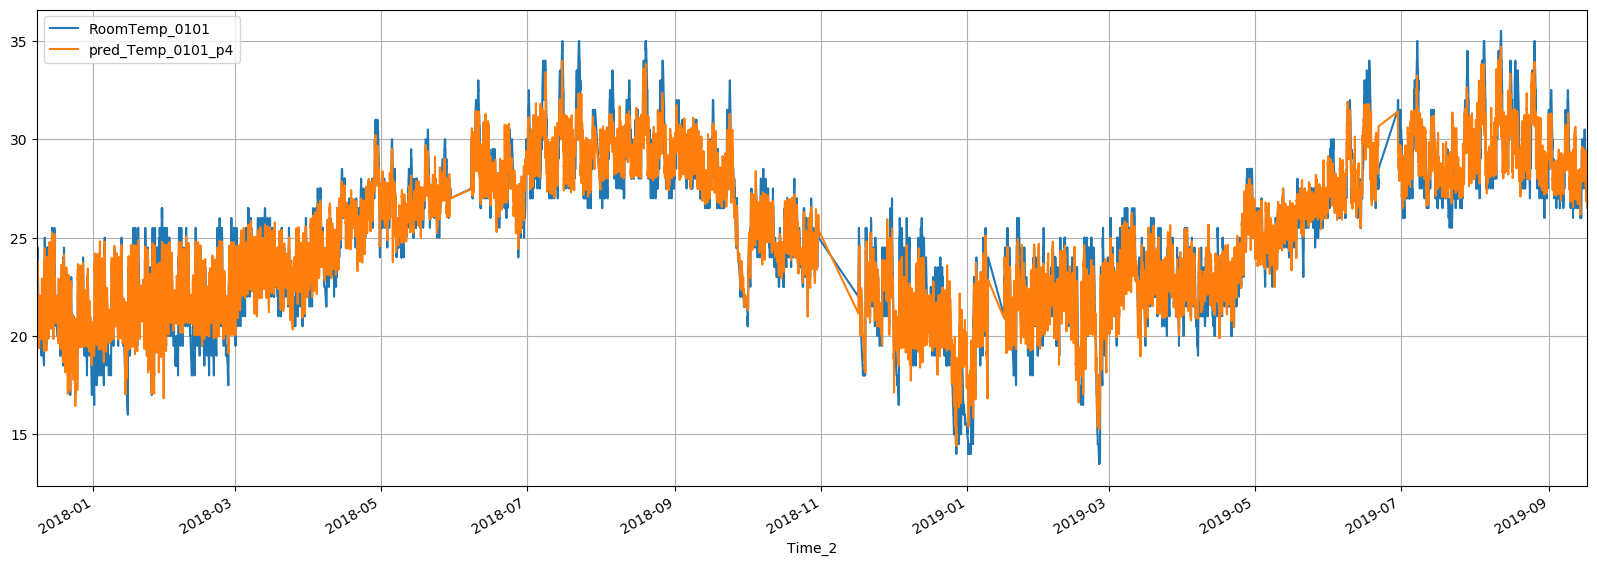

In [52]:
dataset['pred_Temp_0101_p4'] = reg.predict(X)
dataset = dataset.set_index('Time_2')
plt.figure(figsize=(20, 7),dpi=100)
dataset['RoomTemp_0101'].plot()
dataset['pred_Temp_0101_p4'].plot()
plt.plot
plt.grid(linestyle='-')
plt.legend()
plt.savefig('./graph/4-1.png')
plt.show()

## 4 103

In [53]:
dataset = pd.read_csv('./Datasets/103_processed.csv')
dataset = clean_NaN(dataset)
dataset['Time_2']=pd.to_datetime(dataset['Time_2'], format='%Y-%m-%d %H:%M:%S')
dataset = dataset.set_index('Time_2')
# 加入month和hour
dataset['month'] = dataset.index.month
dataset['hour'] = dataset.index.hour
dataset = dataset.reset_index()
dataset.tail(10)

,Time_2,OperationModeState_0103,RoomTemp_0103,SetTemp_0103,OnOffState_0103,OUTAIRHUMD,OUTAIRTEMP,month,hour
48375,2019-09-16 20:27:55,1.0,25.5,24.0,0.0,51.455,27.8,9,20
48376,2019-09-16 20:37:55,1.0,26.0,24.0,0.0,51.455,27.8,9,20
48377,2019-09-16 20:47:55,1.0,26.0,24.0,0.0,51.455,27.3,9,20
48378,2019-09-16 20:57:55,1.0,26.0,24.0,0.0,51.455,27.3,9,20
48379,2019-09-16 21:07:55,1.0,26.5,24.0,0.0,52.495,27.3,9,21
48380,2019-09-16 21:17:55,1.0,26.5,24.0,0.0,52.495,27.3,9,21
48381,2019-09-16 21:27:55,1.0,26.5,24.0,0.0,52.495,27.3,9,21
48382,2019-09-16 21:37:55,1.0,26.5,24.0,0.0,52.495,26.8,9,21
48383,2019-09-16 21:47:55,1.0,26.5,24.0,0.0,53.535,26.8,9,21
48384,2019-09-16 21:57:55,1.0,26.5,24.0,0.0,53.535,26.8,9,21


In [54]:
# ['OperationModeState_0101', 'OnOffState_0101', 'OUTAIRHUMD', 'OUTAIRTEMP']
feature = [list(dataset.columns)[1],list(dataset.columns)[4],list(dataset.columns)[5],list(dataset.columns)[6],list(dataset.columns)[7],list(dataset.columns)[8]]
# ['RoomTemp_0101']
label = [list(dataset.columns)[2]]

# Split the data but use all the columns of the csv file
X = dataset[feature]
#print(X.shape)
Y = dataset[label] 
#print(Y.shape)


# Split the data into training and testing(75% training and 25% testing data)
xtrain,xtest,ytrain,ytest=train_test_split(X, Y, random_state=1)

#print(xtrain.shape)
#print(xtest.shape)

#min_max_scaler = preprocessing.MinMaxScaler()
#X = min_max_scaler.fit_transform(X)
#Y = min_max_scaler.fit_transform(Y)


In [55]:
y_pred, reg = randomForestPredict(xtrain, ytrain, xtest, ytest)

/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MSE 1.623898120980733
MAE 0.921583184008047
score 0.895638146958814


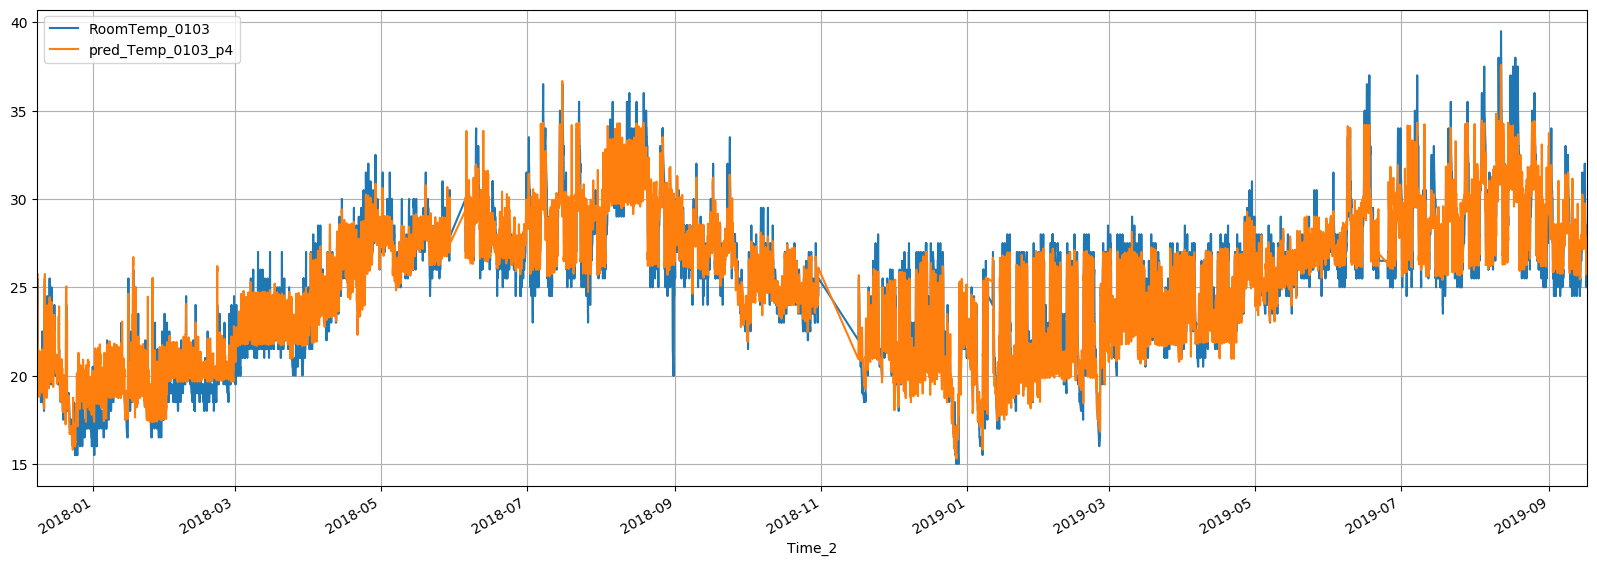

In [56]:
dataset['pred_Temp_0103_p4'] = reg.predict(X)
dataset = dataset.set_index('Time_2')
plt.figure(figsize=(20, 7),dpi=100)
dataset['RoomTemp_0103'].plot()
dataset['pred_Temp_0103_p4'].plot()
plt.plot
plt.grid(linestyle='-')
plt.legend()
plt.savefig('./graph/4-2.png')
plt.show()

## 4 144

In [57]:
dataset = pd.read_csv('./Datasets/144_processed.csv')
dataset = clean_NaN(dataset)
dataset['Time_2']=pd.to_datetime(dataset['Time_2'], format='%Y-%m-%d %H:%M:%S')
dataset = dataset.set_index('Time_2')
# 加入month和hour
dataset['month'] = dataset.index.month
dataset['hour'] = dataset.index.hour
dataset = dataset.reset_index()
dataset.tail(10)

,Time_2,OperationModeState_0144,RoomTemp_0144,SetTemp_0144,OnOffState_0144,OUTAIRHUMD,OUTAIRTEMP,month,hour
48077,2019-10-10 02:17:21,1.0,24.4,24.0,0.0,68.03,20.7,10,2
48078,2019-10-10 02:27:21,1.0,24.4,24.0,0.0,68.03,20.7,10,2
48079,2019-10-10 02:37:21,1.0,24.4,24.0,0.0,68.03,20.7,10,2
48080,2019-10-10 02:47:21,1.0,24.4,24.0,0.0,68.03,20.7,10,2
48081,2019-10-10 02:57:21,1.0,24.4,24.0,0.0,68.03,20.7,10,2
48082,2019-10-10 03:07:21,1.0,24.4,24.0,0.0,68.03,20.7,10,3
48083,2019-10-10 05:07:21,1.0,24.4,24.0,0.0,69.07,20.2,10,5
48084,2019-10-10 05:17:21,1.0,24.4,24.0,0.0,69.07,20.2,10,5
48085,2019-10-10 05:27:21,1.0,24.4,24.0,0.0,69.07,20.2,10,5
48086,2019-10-10 05:37:21,1.0,24.4,24.0,0.0,69.07,20.2,10,5


In [58]:
# ['OperationModeState_0101', 'OnOffState_0101', 'OUTAIRHUMD', 'OUTAIRTEMP']
feature = [list(dataset.columns)[1],list(dataset.columns)[4],list(dataset.columns)[5],list(dataset.columns)[6],list(dataset.columns)[7],list(dataset.columns)[8]]
# ['RoomTemp_0101']
label = [list(dataset.columns)[2]]

# Split the data but use all the columns of the csv file
X = dataset[feature]
#print(X.shape)
Y = dataset[label] 
#print(Y.shape)


# Split the data into training and testing(75% training and 25% testing data)
xtrain,xtest,ytrain,ytest=train_test_split(X, Y, random_state=1)

#print(xtrain.shape)
#print(xtest.shape)

#min_max_scaler = preprocessing.MinMaxScaler()
#X = min_max_scaler.fit_transform(X)
#Y = min_max_scaler.fit_transform(Y)


In [59]:
y_pred, reg = randomForestPredict(xtrain, ytrain, xtest, ytest)

/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MSE 0.6817207101343213
MAE 0.5632273022912481
score 0.9650571702441114


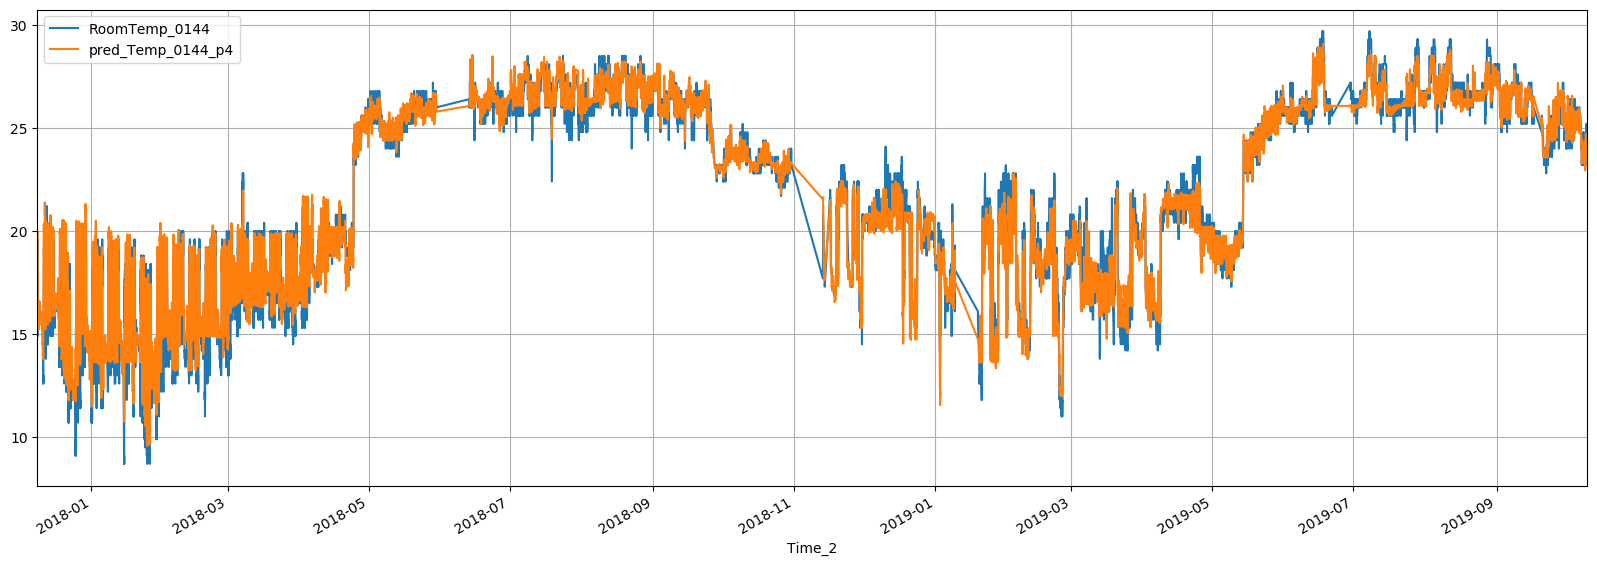

In [60]:
dataset['pred_Temp_0144_p4'] = reg.predict(X)
dataset = dataset.set_index('Time_2')
plt.figure(figsize=(20, 7),dpi=100)
dataset['RoomTemp_0144'].plot()
dataset['pred_Temp_0144_p4'].plot()
plt.plot
plt.grid(linestyle='-')
plt.legend()
plt.savefig('./graph/4-3.png')
plt.show()

# Part 5

In [14]:
# Function that shows the feature importance ranking
def f_importances(coef, names):
    imp = np.absolute(coef)
    imp,names = zip(*sorted(zip(imp, names)))
    plt.figure(figsize = (15, 12))
    plt.subplot(1, 2, 1)
    plt.title('Feature Importance')
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

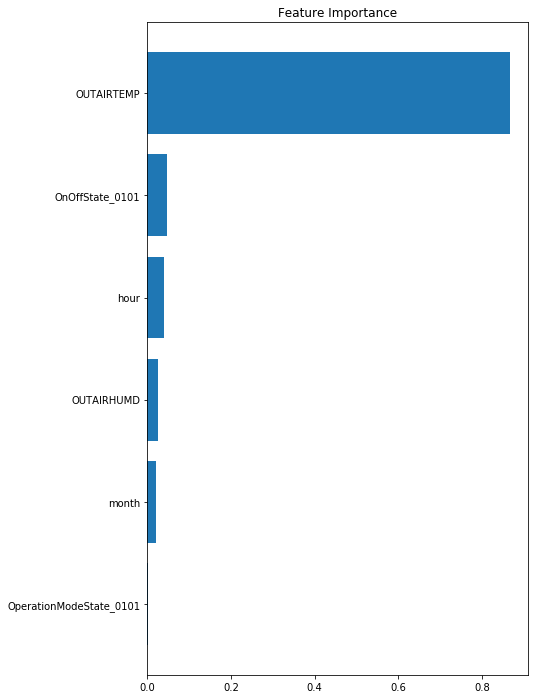

In [15]:
feature_importances = reg.feature_importances_

# call the f_importance function to plot the figure
f_importances(feature_importances, xtrain)

In [17]:
dataset = pd.read_csv('./Datasets/103_processed.csv')
dataset = clean_NaN(dataset)
dataset['Time_2']=pd.to_datetime(dataset['Time_2'], format='%Y-%m-%d %H:%M:%S')
dataset = dataset.set_index('Time_2')
# 加入month和hour
dataset['month'] = dataset.index.month
dataset['hour'] = dataset.index.hour
dataset = dataset.reset_index()
dataset.tail(10)

# ['OperationModeState_0101', 'OnOffState_0101', 'OUTAIRHUMD', 'OUTAIRTEMP']
feature = [list(dataset.columns)[1],list(dataset.columns)[4],list(dataset.columns)[5],list(dataset.columns)[6],list(dataset.columns)[7],list(dataset.columns)[8]]
# ['RoomTemp_0101']
label = [list(dataset.columns)[2]]

# Split the data but use all the columns of the csv file
X = dataset[feature]
#print(X.shape)
Y = dataset[label] 
#print(Y.shape)

# Split the data into training and testing(75% training and 25% testing data)
xtrain,xtest,ytrain,ytest=train_test_split(X, Y, random_state=1)

#print(xtrain.shape)
#print(xtest.shape)
#min_max_scaler = preprocessing.MinMaxScaler()
#X = min_max_scaler.fit_transform(X)
#Y = min_max_scaler.fit_transform(Y)

In [18]:
y_pred,reg = randomForestPredict(xtrain, ytrain, xtest, ytest)

/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MSE 1.6228705062712998
MAE 0.9215358608449289
score 0.8957041879092303


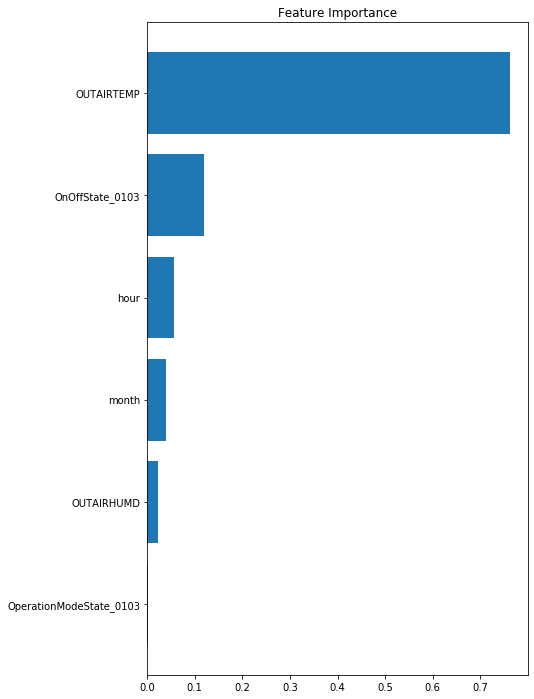

In [19]:
feature_importances = reg.feature_importances_

# call the f_importance function to plot the figure
f_importances(feature_importances, xtrain)

In [20]:
dataset = pd.read_csv('./Datasets/144_processed.csv')
dataset = clean_NaN(dataset)
dataset['Time_2']=pd.to_datetime(dataset['Time_2'], format='%Y-%m-%d %H:%M:%S')
dataset = dataset.set_index('Time_2')
# 加入month和hour
dataset['month'] = dataset.index.month
dataset['hour'] = dataset.index.hour
dataset = dataset.reset_index()
dataset.tail(10)

# ['OperationModeState_0101', 'OnOffState_0101', 'OUTAIRHUMD', 'OUTAIRTEMP']
feature = [list(dataset.columns)[1],list(dataset.columns)[4],list(dataset.columns)[5],list(dataset.columns)[6],list(dataset.columns)[7],list(dataset.columns)[8]]
# ['RoomTemp_0101']
label = [list(dataset.columns)[2]]

# Split the data but use all the columns of the csv file
X = dataset[feature]
#print(X.shape)
Y = dataset[label] 
#print(Y.shape)

# Split the data into training and testing(75% training and 25% testing data)
xtrain,xtest,ytrain,ytest=train_test_split(X, Y, random_state=1)

#print(xtrain.shape)
#print(xtest.shape)
#min_max_scaler = preprocessing.MinMaxScaler()
#X = min_max_scaler.fit_transform(X)
#Y = min_max_scaler.fit_transform(Y)

In [21]:
y_pred, reg = randomForestPredict(xtrain, ytrain, xtest, ytest)

/Users/brandonkwok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MSE 0.6823458302921175
MAE 0.5634790901946727
score 0.9650251285781826


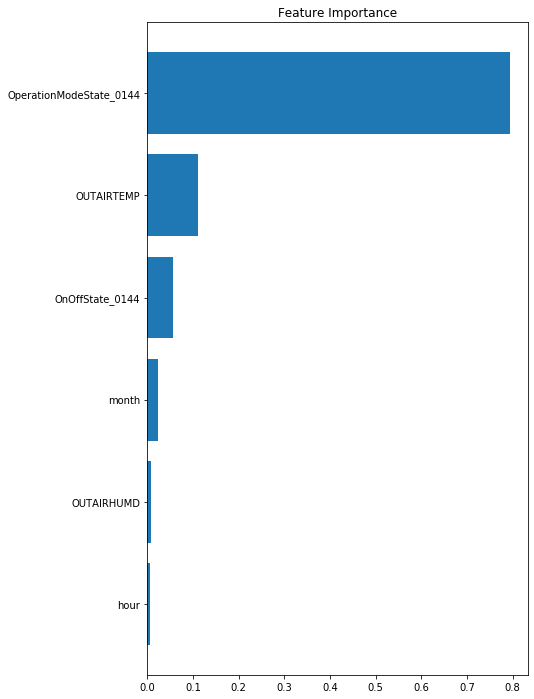

In [22]:
feature_importances = reg.feature_importances_

# call the f_importance function to plot the figure
f_importances(feature_importances, xtrain)